[ Getting Started with Redis and RediSearch](https://www.cloudskillsboost.google/focuses/14763?catalog_rank=%7B%22rank%22%3A1%2C%22num_filters%22%3A0%2C%22has_search%22%3Atrue%7D&parent=catalog&search_id=23616234)

In [ ]:
# https://university.redis.com/

# https://redis.io/docs/stack/search/

# https://www.youtube.com/channel/UCybK6TMZFQeSN74jzTiDWfg?view_as=subscriber

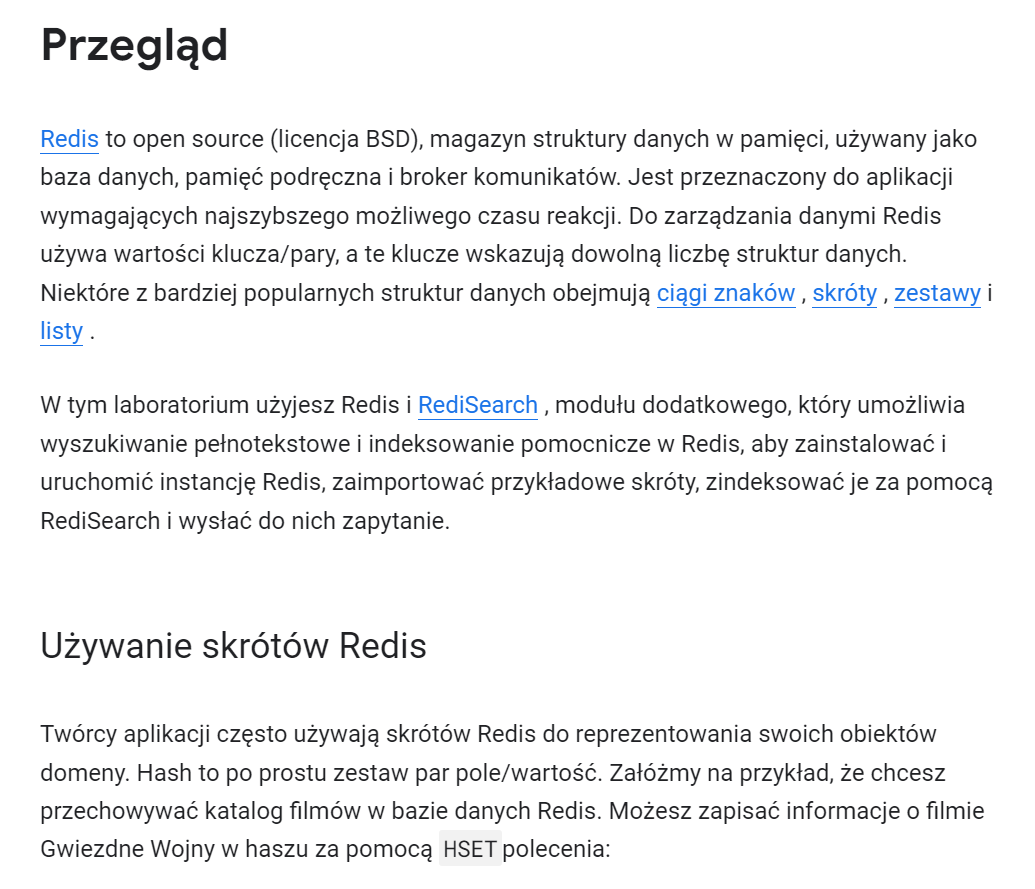

In [ ]:
# https://redis.io/docs/stack/search/

In [ ]:
# https://redis.io/commands/?group=string
# https://redis.io/commands/?group=hash
# https://redis.io/commands/?group=set
# https://redis.io/commands/?group=list

In [ ]:
# https://redis.io/commands/hset/

HSET movie:001 title "Star Wars: Episode IV - A New Hope" director "George Lucas" plot "The galaxy is in a period of civil war...."

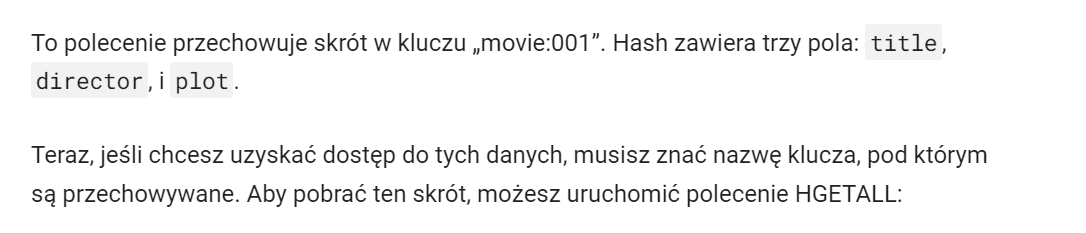

In [ ]:
HGETALL movie:001

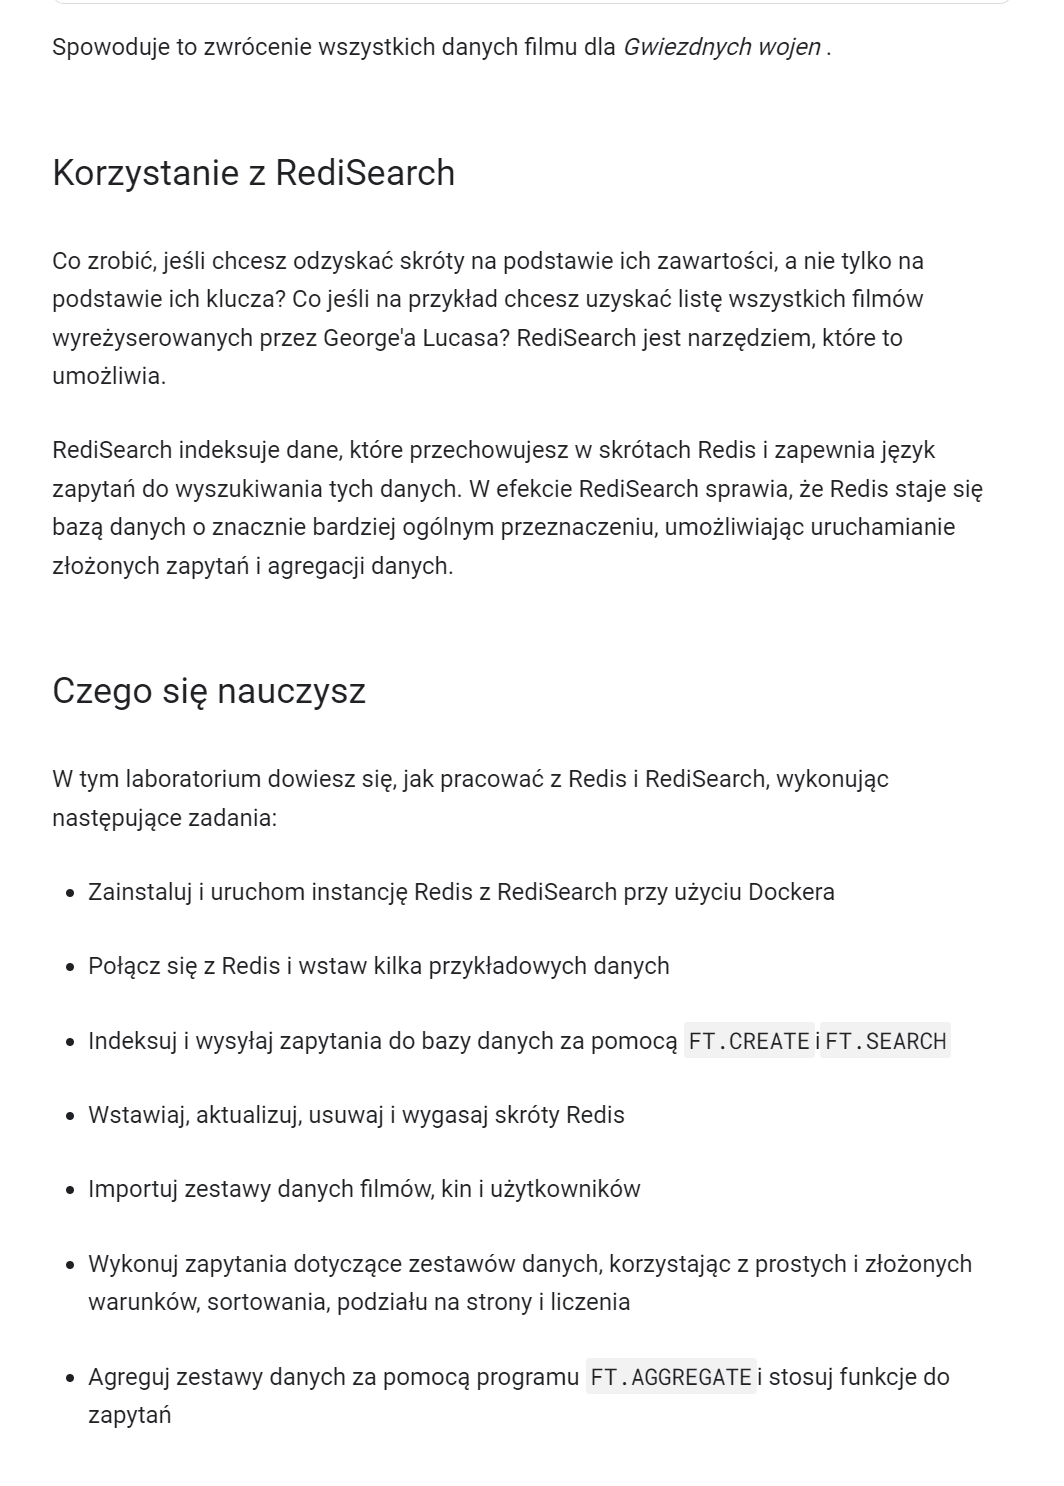

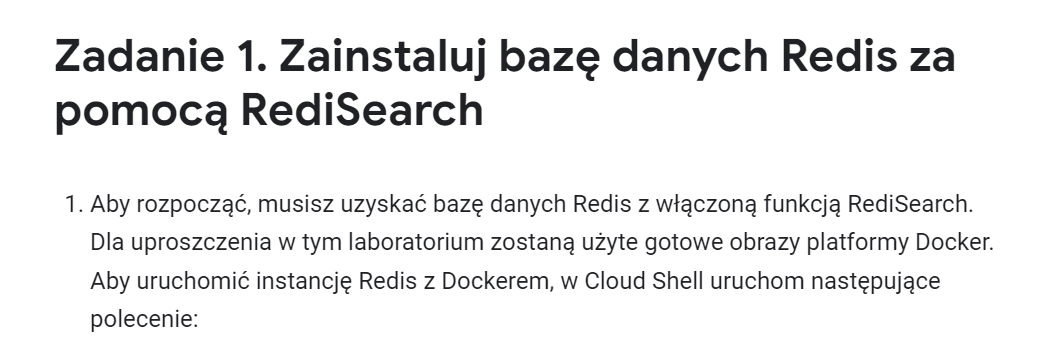

In [ ]:
docker run -it --rm --name redis-search-2 -p 6379:6379 redislabs/redisearch:2.0.0

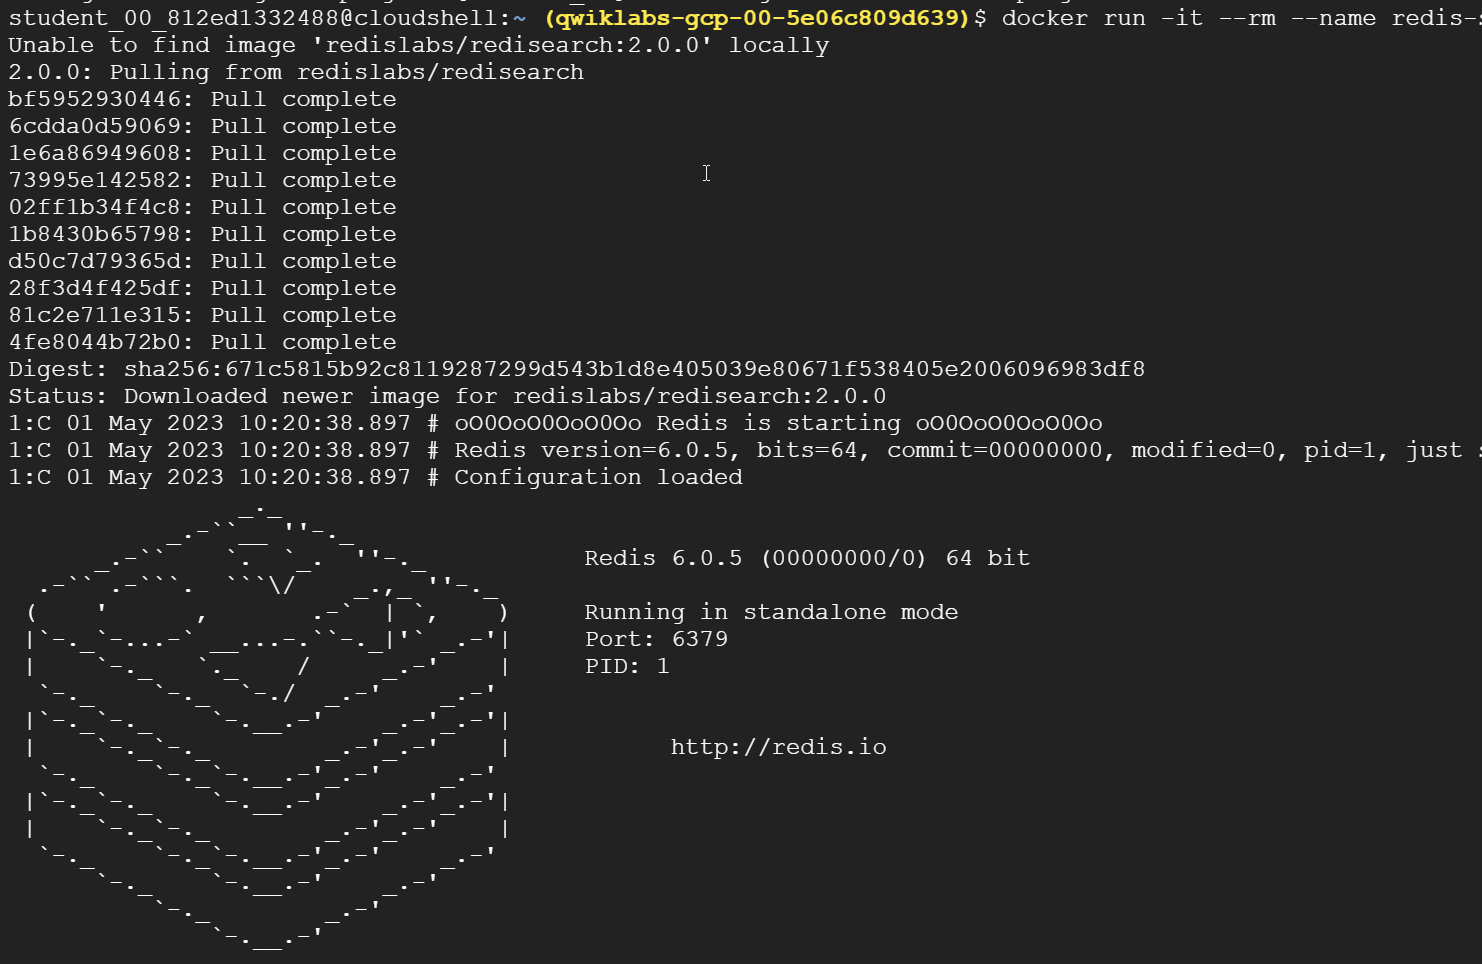

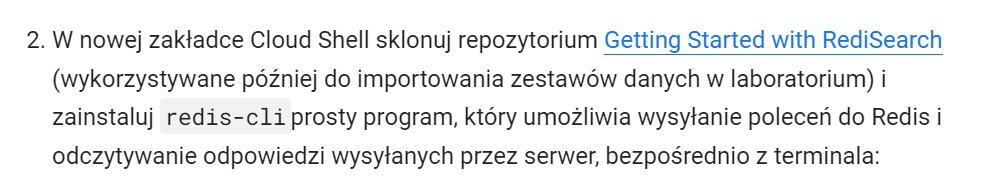

In [ ]:
# https://github.com/RediSearch/redisearch-getting-started

In [ ]:
git clone https://github.com/RediSearch/redisearch-getting-started

In [ ]:
sudo apt-get install redis-tools

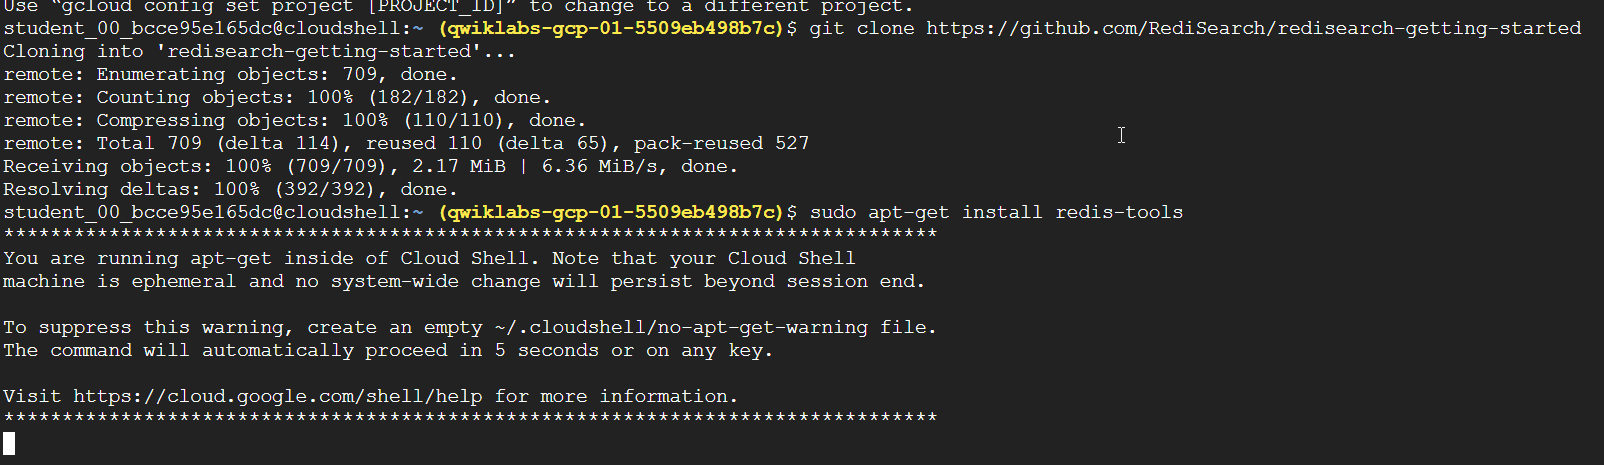

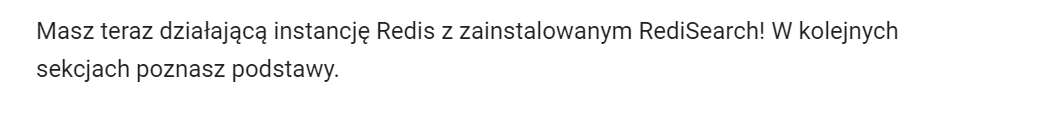

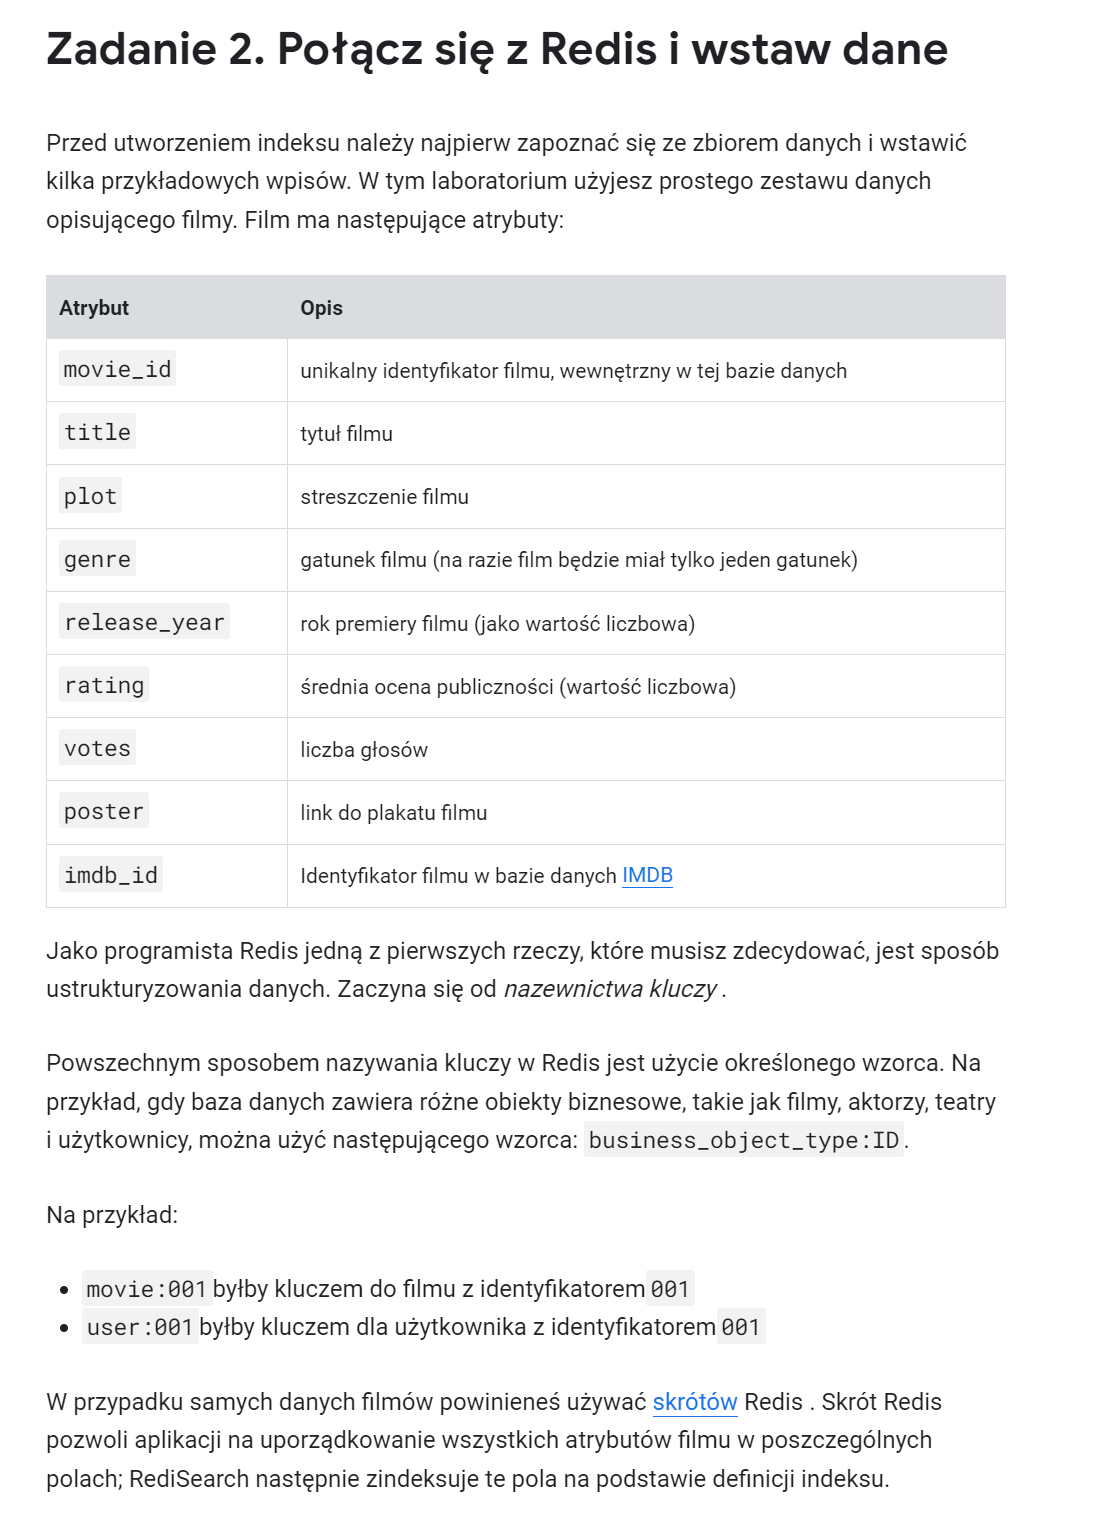

In [ ]:
# https://redis.io/docs/data-types/

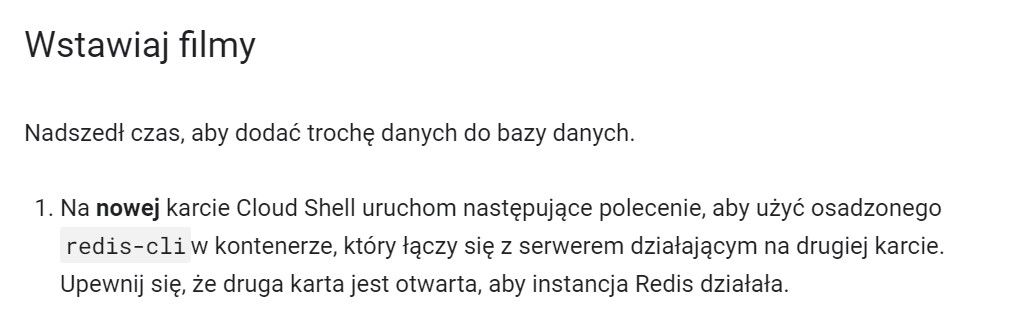

In [ ]:
docker exec -it redis-search-2 redis-cli

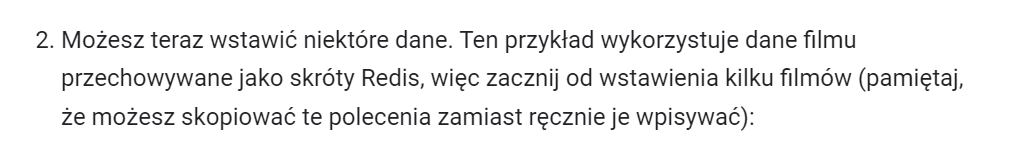

In [ ]:
HSET movie:11002 title "Star Wars: Episode V - The Empire Strikes Back" plot "After the Rebels are brutally overpowered by the Empire on the ice planet Hoth, Luke Skywalker begins Jedi training with Yoda, while his friends are pursued by Darth Vader and a bounty hunter named Boba Fett all over the galaxy." release_year 1980 genre "Action" rating 8.7 votes 1127635 imdb_id tt0080684

In [ ]:
HSET movie:11003 title "The Godfather" plot "The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son." release_year 1972 genre "Drama" rating 9.2 votes 1563839 imdb_id tt0068646

In [ ]:
HSET movie:11004 title "Heat" plot "A group of professional bank robbers start to feel the heat from police when they unknowingly leave a clue at their latest heist." release_year 1995 genre "Thriller" rating 8.2 votes 559490 imdb_id tt0113277

In [ ]:
HSET "movie:11005" title "Star Wars: Episode VI - Return of the Jedi" genre "Action" votes 906260 rating 8.3 release_year 1983  plot "The Rebels dispatch to Endor to destroy the second Empire's Death Star." ibmdb_id "tt0086190"

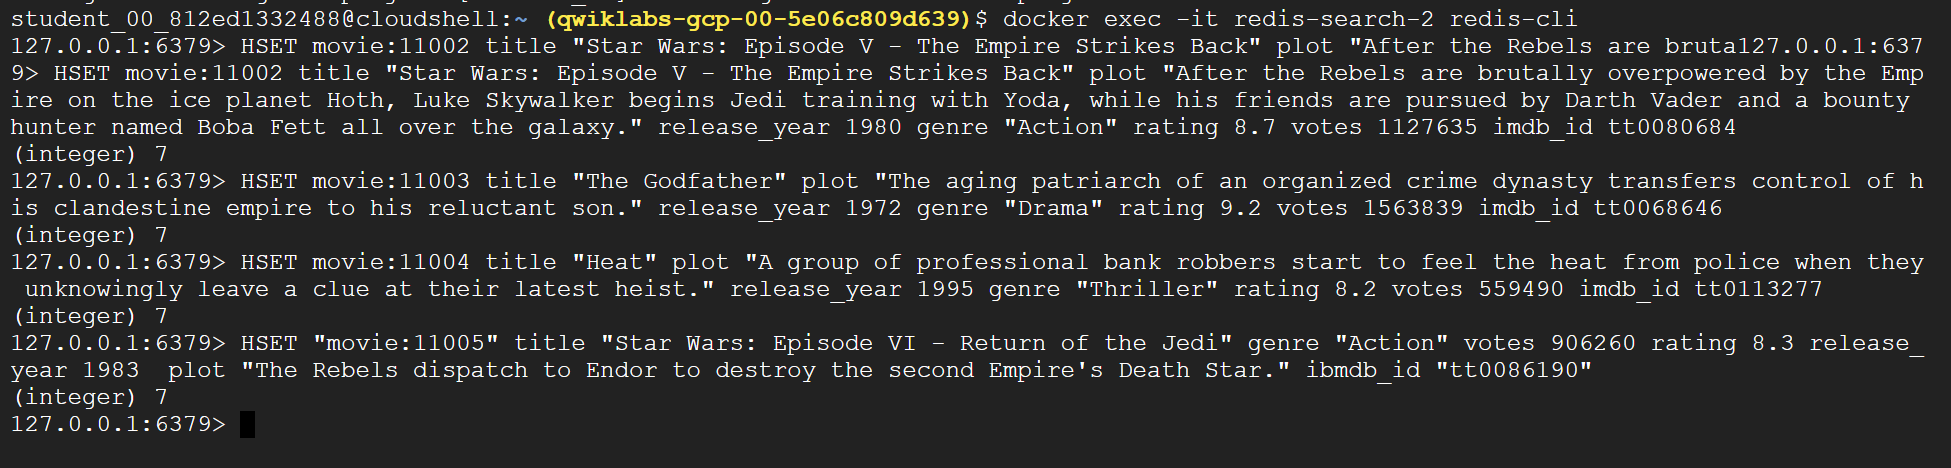

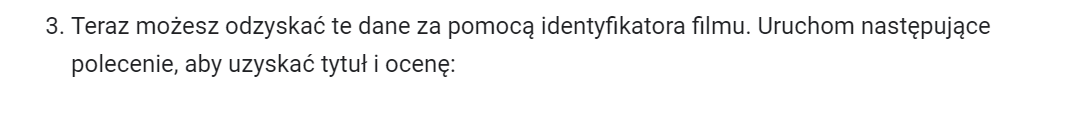

In [ ]:
HMGET movie:11002 title rating

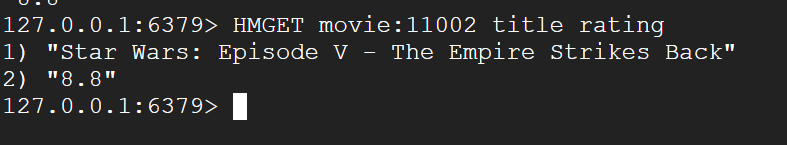

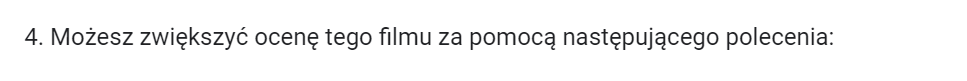

In [ ]:
HINCRBYFLOAT movie:11002 rating 0.1

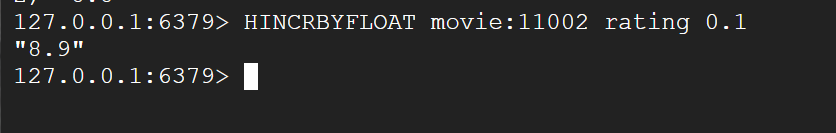

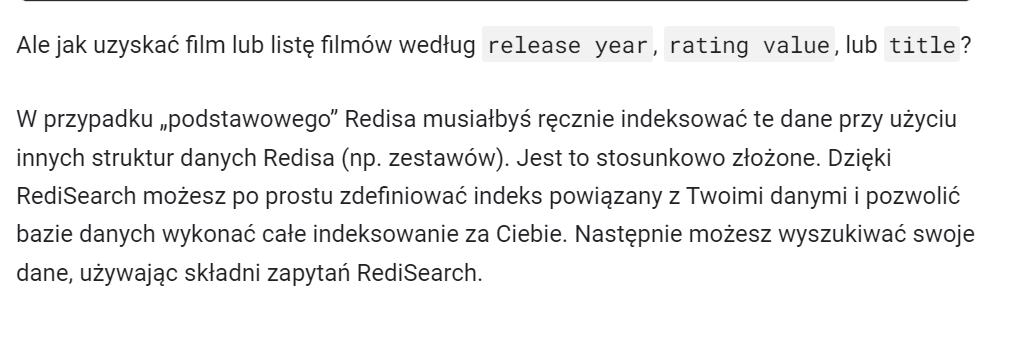

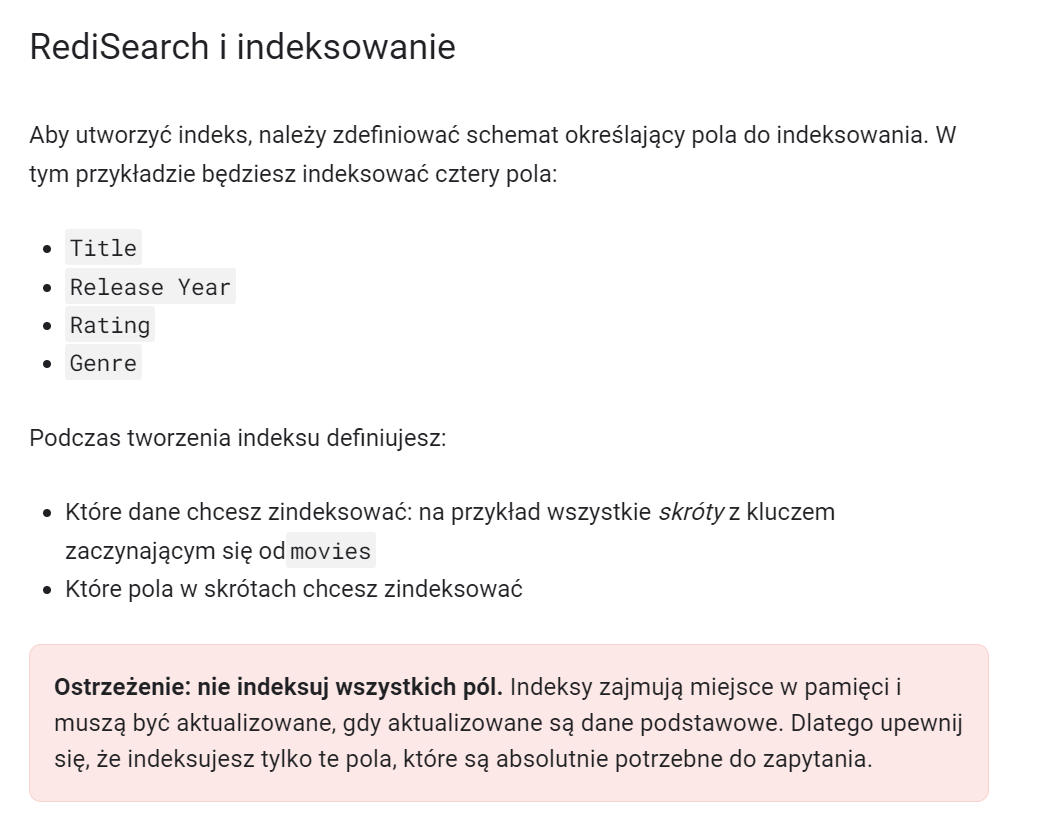

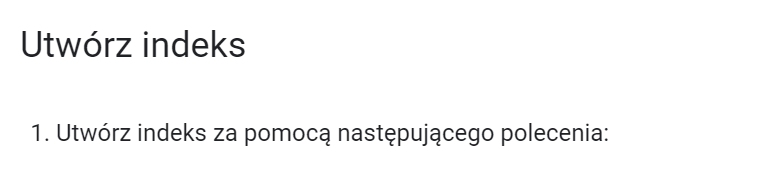

In [ ]:
FT.CREATE idx:movie ON hash PREFIX 1 "movie:" SCHEMA title TEXT SORTABLE release_year NUMERIC SORTABLE rating NUMERIC SORTABLE genre TAG SORTABLE

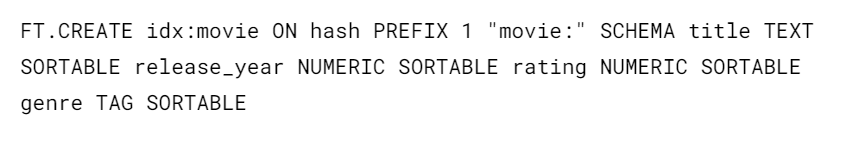

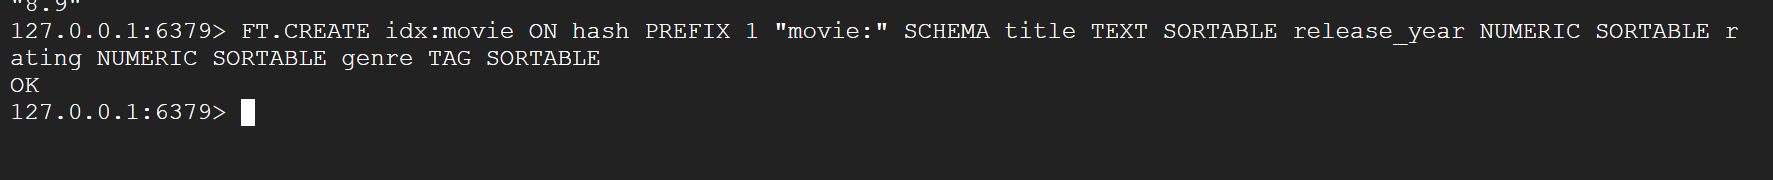

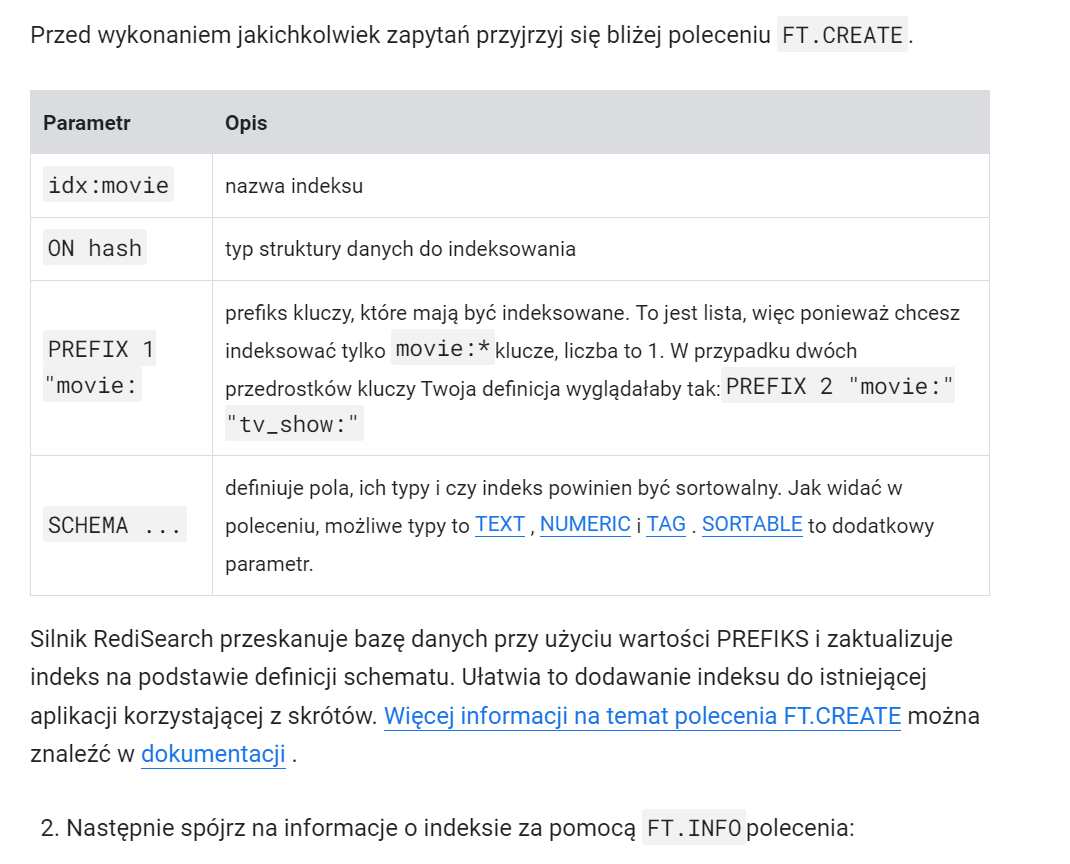

In [ ]:
# https://redis.io/docs/stack/search/commands/#ftcreate

In [ ]:
FT.INFO idx:movie

In [ ]:
127.0.0.1:6379> FT.INFO idx:movie
 1) index_name
 2) idx:movie
 3) index_options
 4) (empty array)
 5) index_definition
 6)  1) key_type
     2) HASH
     3) prefixes
     4) 1) movie:
     5) language_field
     6) __language
     7) default_score
     8) "1"
     9) score_field
    10) __score
    11) payload_field
    12) __payload
 7) fields
 8) 1) 1) title
       2) type
       3) TEXT
       4) WEIGHT
       5) "1"
       6) SORTABLE
    2) 1) release_year
       2) type
       3) NUMERIC
       4) SORTABLE
    3) 1) rating
       2) type
       3) NUMERIC
       4) SORTABLE
    4) 1) genre
       2) type
       3) TAG
       4) SEPARATOR
       5) ,
       6) SORTABLE
 9) num_docs
10) "4"
11) max_doc_id
12) "4"
13) num_terms
14) "17"
15) num_records
16) "42"
17) inverted_sz_mb
18) "0.00020599365234375"
19) total_inverted_index_blocks
20) "26"
21) offset_vectors_sz_mb
22) "2.09808349609375e-05"
23) doc_table_size_mb
24) "0.000354766845703125"
25) sortable_values_size_mb
26) "0.0004901885986328125"
27) key_table_size_mb
28) "0.00013065338134765625"
29) records_per_doc_avg
30) "10.5"
31) bytes_per_record_avg
32) "5.1428570747375488"
33) offsets_per_term_avg
34) "0.52380955219268799"
35) offset_bits_per_record_avg
36) "8"
37) hash_indexing_failures
38) "0"
39) indexing
40) "0"
41) percent_indexed
42) "1"
43) gc_stats
44)  1) bytes_collected
     2) "0"
     3) total_ms_run
     4) "0"
     5) total_cycles
     6) "0"
     7) avarage_cycle_time_ms
     8) "-nan"
     9) last_run_time_ms
    10) "0"
    11) gc_numeric_trees_missed
    12) "0"
    13) gc_blocks_denied
    14) "0"
45) cursor_stats
46) 1) global_idle
    2) (integer) 0
    3) global_total
    4) (integer) 0
    5) index_capacity
    6) (integer) 128
    7) index_total
    8) (integer) 0
127.0.0.1:6379>

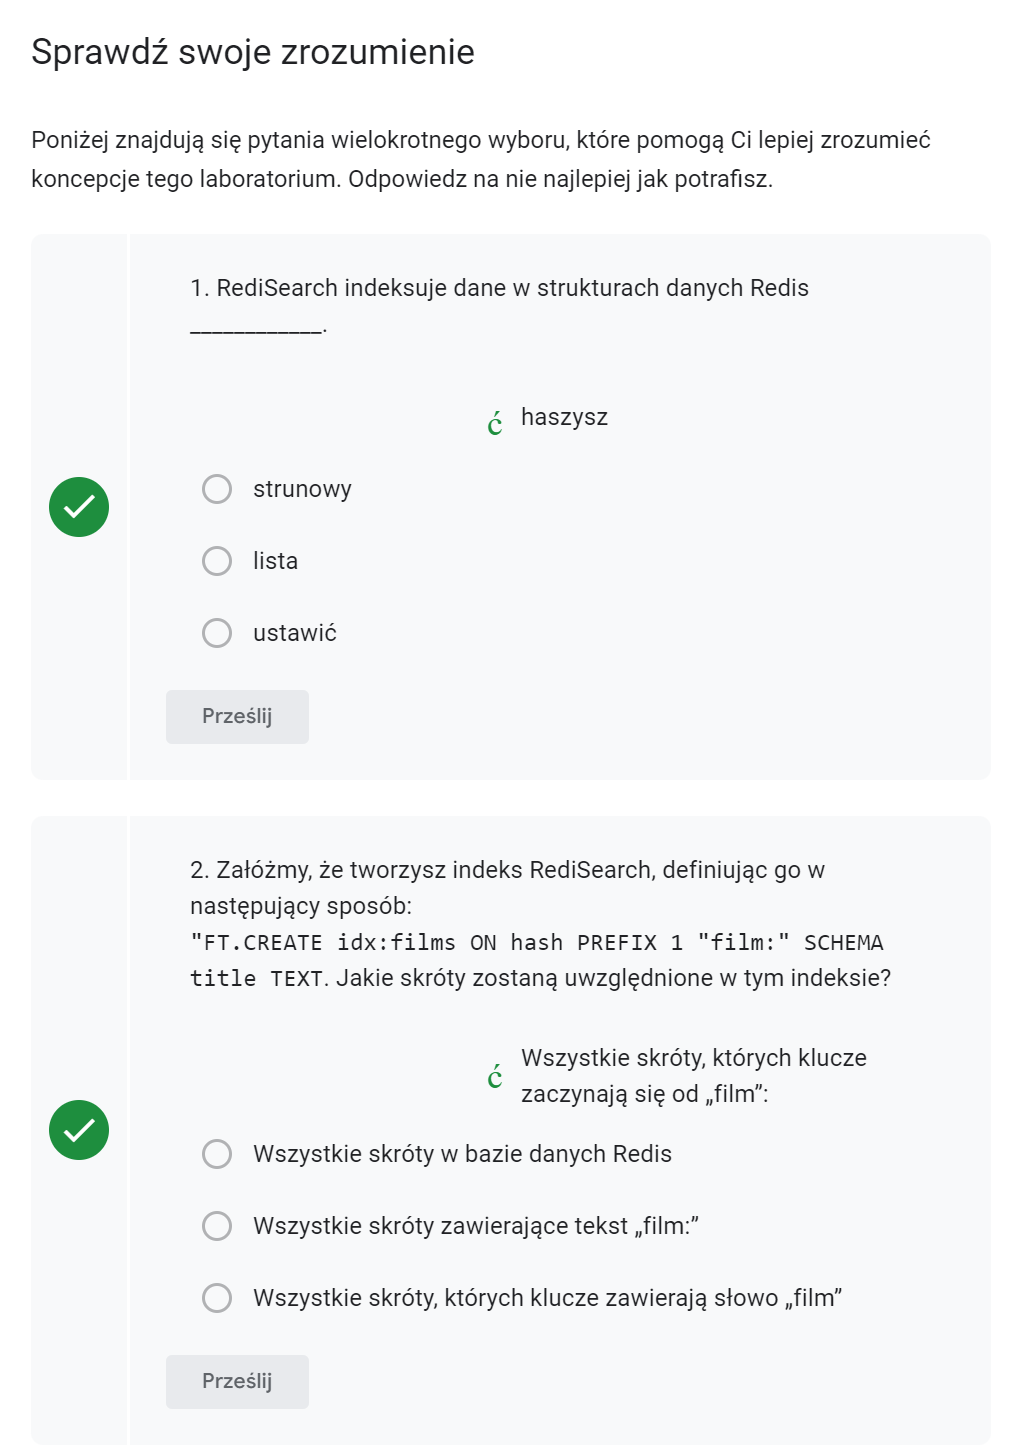

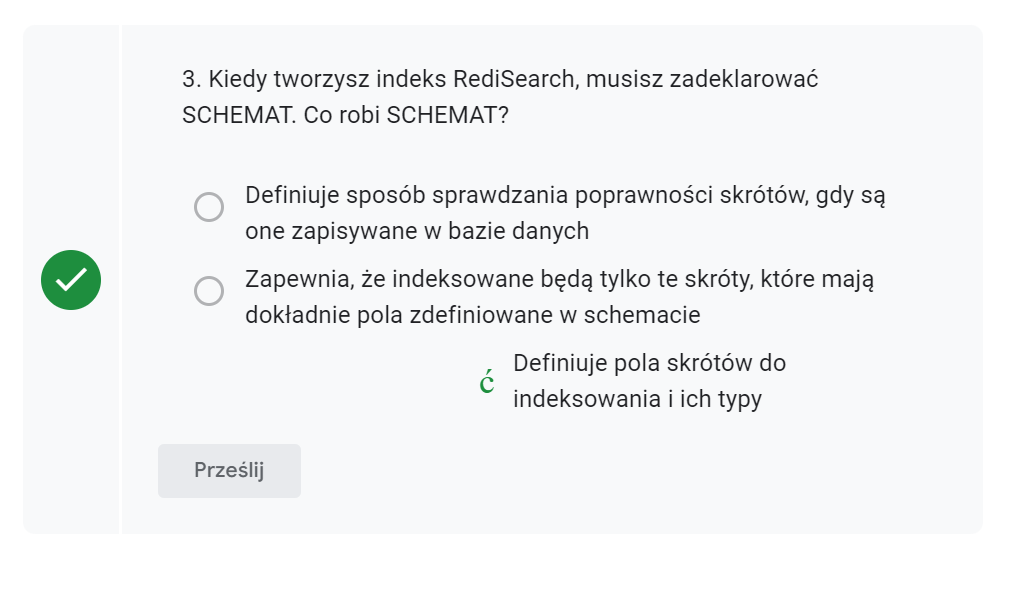

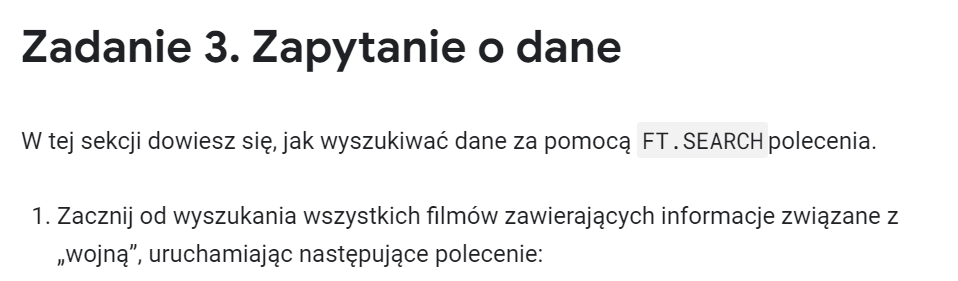

In [ ]:
FT.SEARCH idx:movie "war"

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "war"
1) (integer) 2
2) "movie:11002"
3)  1) "plot"
    2) "After the Rebels are brutally overpowered by the Empire on the ice planet Hoth, Luke Skywalker begins Jedi training with Yoda, while his friends are pursued by Darth Vader and a bounty hunter named Boba Fett all over the galaxy."
    3) "genre"
    4) "Action"
    5) "rating"
    6) "8.9"
    7) "title"
    8) "Star Wars: Episode V - The Empire Strikes Back"
    9) "imdb_id"
   10) "tt0080684"
   11) "release_year"
   12) "1980"
   13) "votes"
   14) "1127635"
4) "movie:11005"
5)  1) "plot"
    2) "The Rebels dispatch to Endor to destroy the second Empire's Death Star."
    3) "genre"
    4) "Action"
    5) "rating"
    6) "8.3"
    7) "title"
    8) "Star Wars: Episode VI - Return of the Jedi"
    9) "release_year"
   10) "1983"
   11) "votes"
   12) "906260"
   13) "ibmdb_id"
   14) "tt0086190"
127.0.0.1:6379>

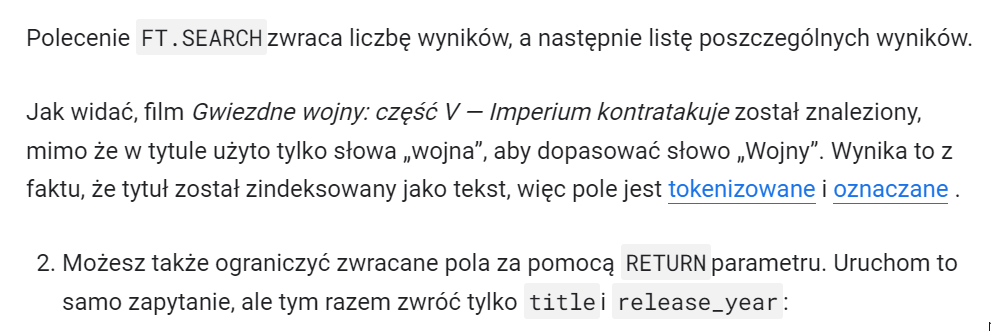

In [ ]:
# https://redis.io/docs/stack/search/reference/escaping/

# https://redis.io/docs/stack/search/reference/stemming/

In [ ]:
FT.SEARCH idx:movie "war -jedi" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "war -jedi" RETURN 2 title release_year
1) (integer) 1
2) "movie:11002"
3) 1) "title"
   2) "Star Wars: Episode V - The Empire Strikes Back"
   3) "release_year"
   4) "1980"
127.0.0.1:6379>

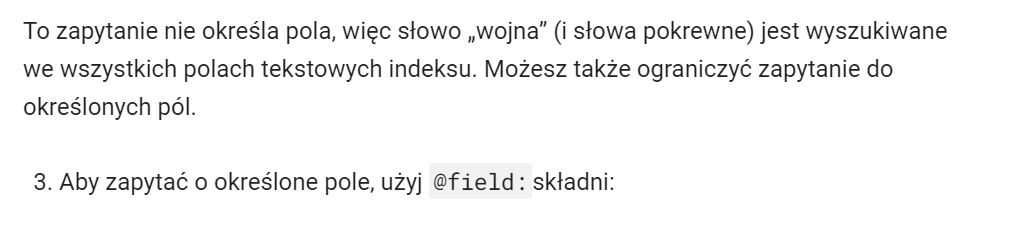

In [ ]:
FT.SEARCH idx:movie "@title:war" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "@title:war" RETURN 2 title release_year
1) (integer) 2
2) "movie:11002"
3) 1) "title"
   2) "Star Wars: Episode V - The Empire Strikes Back"
   3) "release_year"
   4) "1980"
4) "movie:11005"
5) 1) "title"
   2) "Star Wars: Episode VI - Return of the Jedi"
   3) "release_year"
   4) "1983"
127.0.0.1:6379>

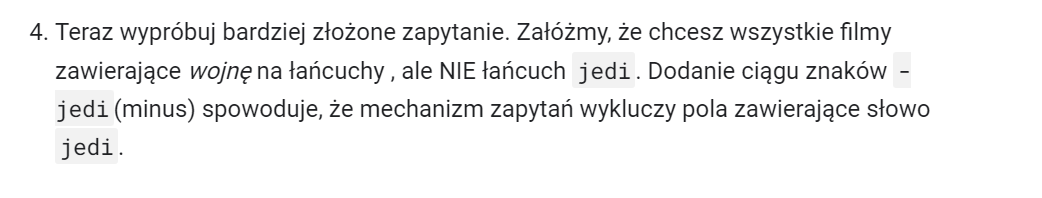

In [ ]:
FT.SEARCH idx:movie "war -jedi" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "war -jedi" RETURN 2 title release_year
1) (integer) 1
2) "movie:11002"
3) 1) "title"
   2) "Star Wars: Episode V - The Empire Strikes Back"
   3) "release_year"
   4) "1980"
127.0.0.1:6379>

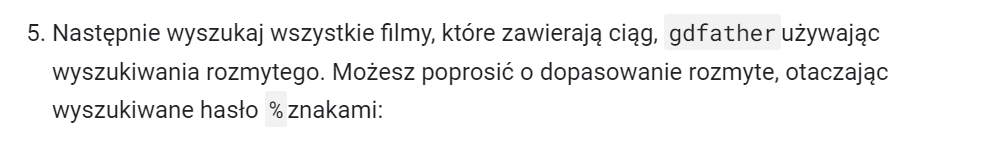

In [ ]:
FT.SEARCH idx:movie " %gdfather% " RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie " %gdfather% " RETURN 2 title release_year
1) (integer) 1
2) "movie:11003"
3) 1) "title"
   2) "The Godfather"
   3) "release_year"
   4) "1972"
127.0.0.1:6379>

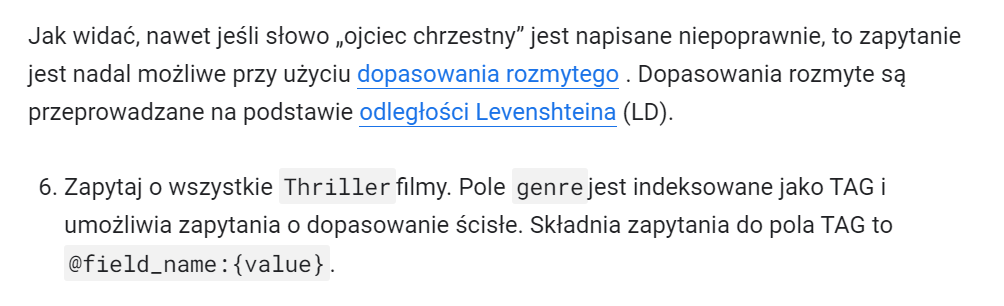

In [ ]:
# https://redis.io/docs/stack/search/reference/query_syntax/#fuzzy-matching

# https://en.wikipedia.org/wiki/Levenshtein_distance

In [ ]:
FT.SEARCH idx:movie "@genre:{Thriller}" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "@genre:{Thriller}" RETURN 2 title release_year
1) (integer) 1
2) "movie:11004"
3) 1) "title"
   2) "Heat"
   3) "release_year"
   4) "1995"
127.0.0.1:6379>

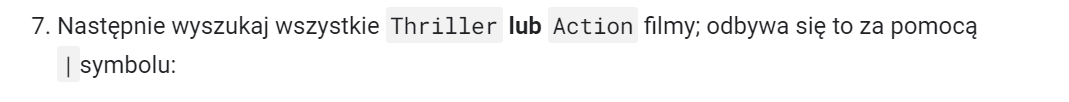

In [ ]:
FT.SEARCH idx:movie "@genre:{Thriller|Action}" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "@genre:{Thriller|Action}" RETURN 2 title release_year
1) (integer) 3
2) "movie:11004"
3) 1) "title"
   2) "Heat"
   3) "release_year"
   4) "1995"
4) "movie:11002"
5) 1) "title"
   2) "Star Wars: Episode V - The Empire Strikes Back"
   3) "release_year"
   4) "1980"
6) "movie:11005"
7) 1) "title"
   2) "Star Wars: Episode VI - Return of the Jedi"
   3) "release_year"
   4) "1983"
127.0.0.1:6379>

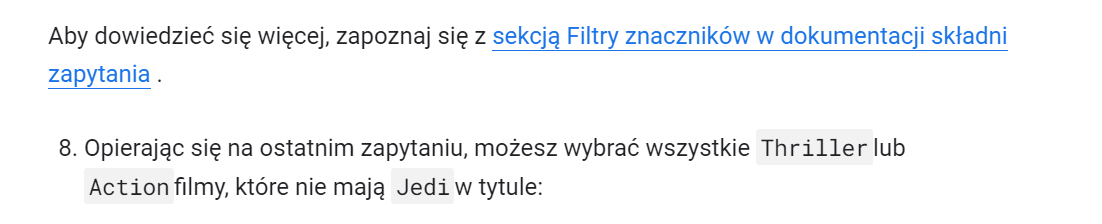

In [ ]:
# https://redis.io/docs/stack/search/reference/query_syntax/#tag-filters

In [ ]:
FT.SEARCH idx:movie "@genre:{Thriller|Action} @title:-jedi" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "@genre:{Thriller|Action} @title:-jedi" RETURN 2 title release_year
1) (integer) 2
2) "movie:11004"
3) 1) "title"
   2) "Heat"
   3) "release_year"
   4) "1995"
4) "movie:11002"
5) 1) "title"
   2) "Star Wars: Episode V - The Empire Strikes Back"
   3) "release_year"
   4) "1980"
127.0.0.1:6379>

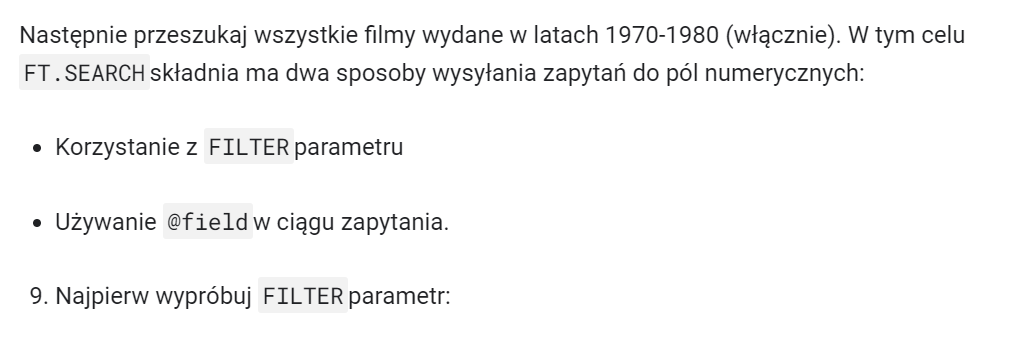

In [ ]:
FT.SEARCH idx:movie * FILTER release_year 1970 1980 RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie * FILTER release_year 1970 1980 RETURN 2 title release_year
1) (integer) 2
2) "movie:11002"
3) 1) "title"
   2) "Star Wars: Episode V - The Empire Strikes Back"
   3) "release_year"
   4) "1980"
4) "movie:11003"
5) 1) "title"
   2) "The Godfather"
   3) "release_year"
   4) "1972"
127.0.0.1:6379>

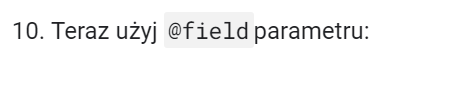

In [ ]:
FT.SEARCH idx:movie "@release_year:[1970 1980]" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "@release_year:[1970 1980]" RETURN 2 title release_year
1) (integer) 2
2) "movie:11002"
3) 1) "title"
   2) "Star Wars: Episode V - The Empire Strikes Back"
   3) "release_year"
   4) "1980"
4) "movie:11003"
5) 1) "title"
   2) "The Godfather"
   3) "release_year"
   4) "1972"
127.0.0.1:6379>

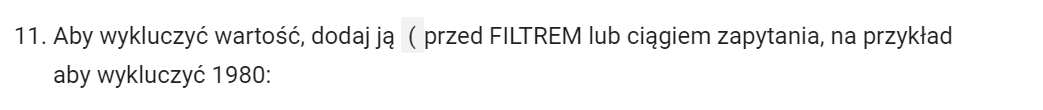

In [ ]:
FT.SEARCH idx:movie "@release_year:[1970 (1980]" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "@release_year:[1970 (1980]" RETURN 2 title release_year
1) (integer) 1
2) "movie:11003"
3) 1) "title"
   2) "The Godfather"
   3) "release_year"
   4) "1972"
127.0.0.1:6379>

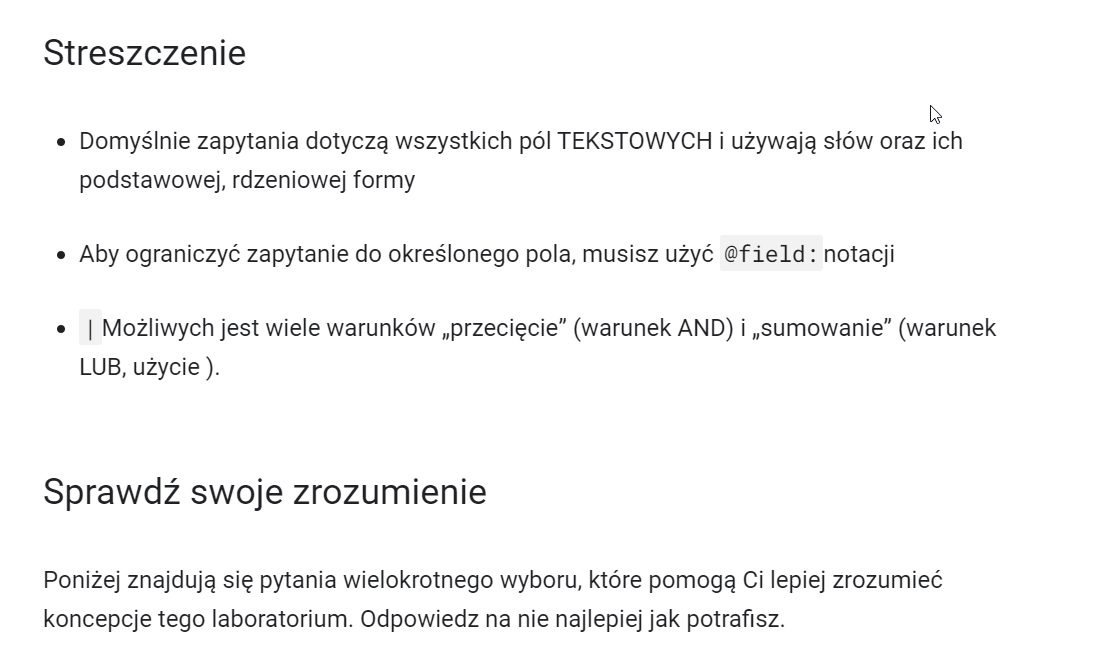

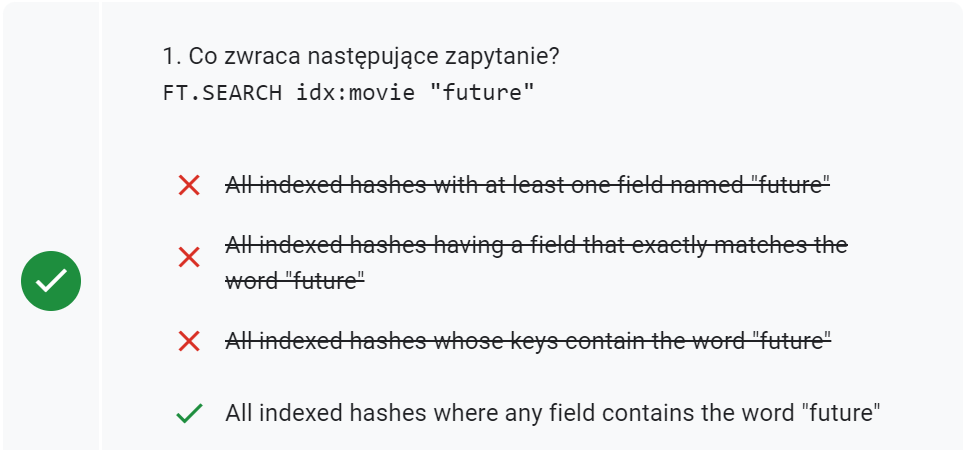

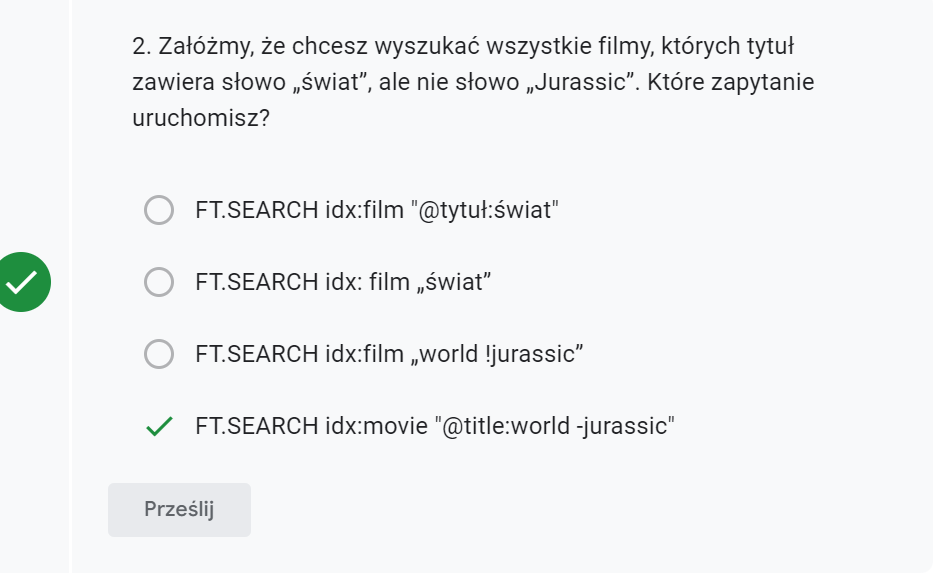

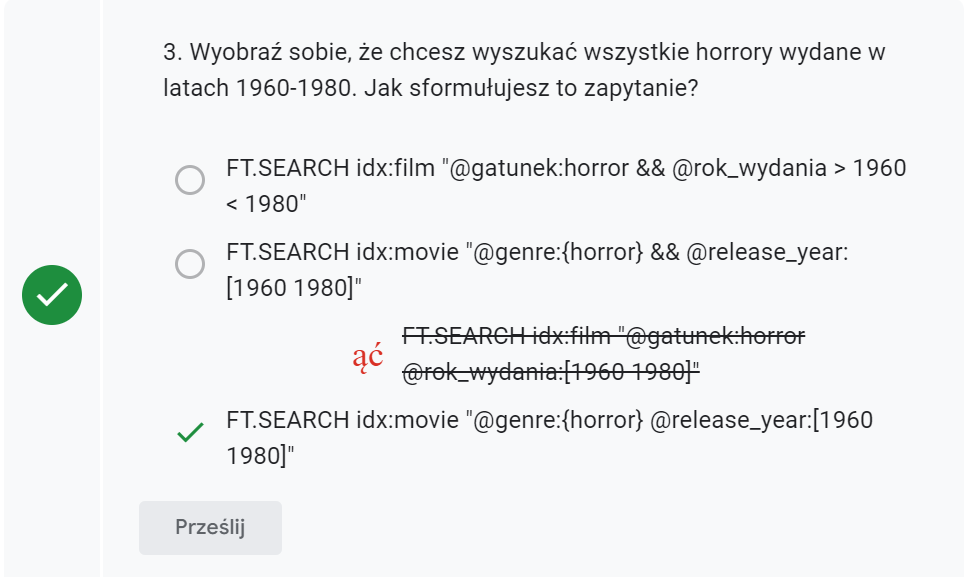

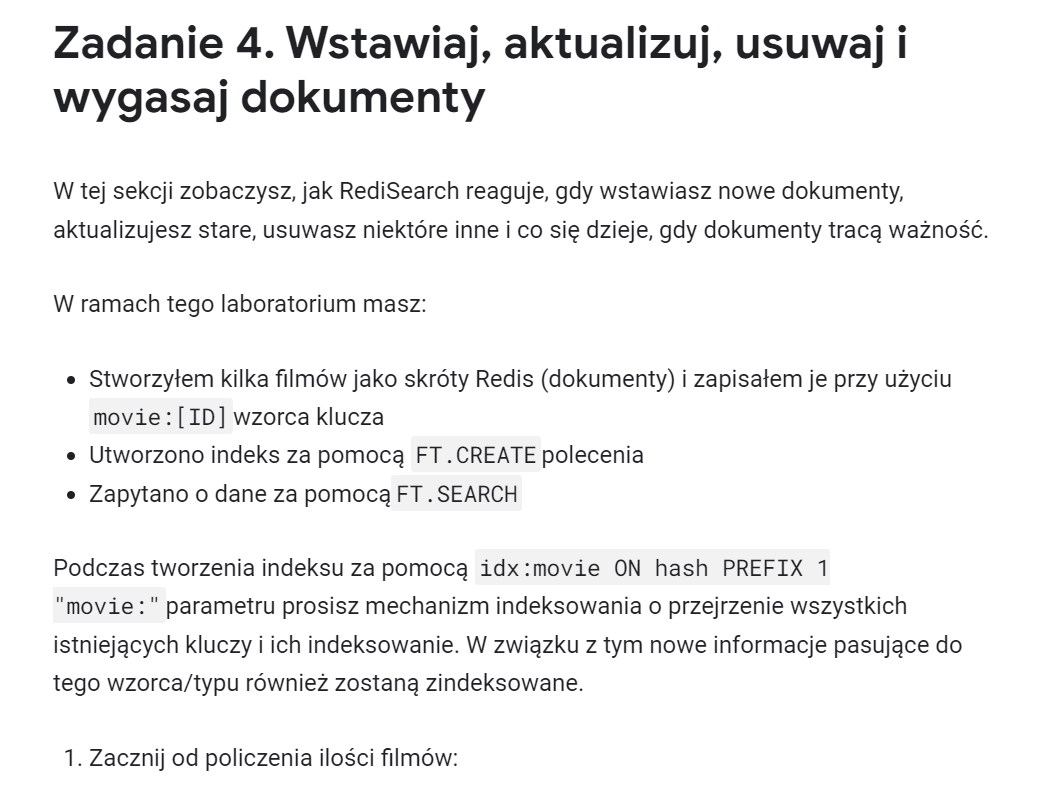

In [ ]:
FT.SEARCH idx:movie "*" LIMIT 0 0

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "*" LIMIT 0 0
1) (integer) 4
127.0.0.1:6379>

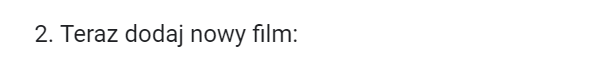

In [ ]:
HSET movie:11033 title "Tomorrow Never Dies" plot "James Bond sets out to stop a media mogul's plan to induce war between China and the U.K in order to obtain exclusive global media coverage." release_year 1997 genre "Action" rating 6.5 votes 177732 imdb_id tt0120347

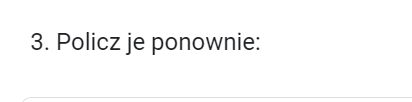

In [ ]:
FT.SEARCH idx:movie "*" LIMIT 0 0

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "*" LIMIT 0 0
1) (integer) 5
127.0.0.1:6379>

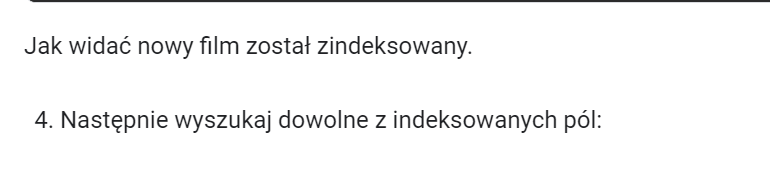

In [ ]:
FT.SEARCH idx:movie "never" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "never" RETURN 2 title release_year
1) (integer) 1
2) "movie:11033"
3) 1) "title"
   2) "Tomorrow Never Dies"
   3) "release_year"
   4) "1997"
127.0.0.1:6379>

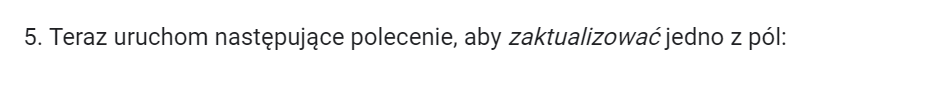

In [ ]:
HSET movie:11033 title "Tomorrow Never Dies - 007"

In [ ]:
127.0.0.1:6379> HSET movie:11033 title "Tomorrow Never Dies - 007"
(integer) 0
127.0.0.1:6379>

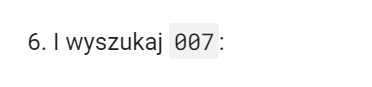

In [ ]:
FT.SEARCH idx:movie "007" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "007" RETURN 2 title release_year
1) (integer) 1
2) "movie:11033"
3) 1) "title"
   2) "Tomorrow Never Dies - 007"
   3) "release_year"
   4) "1997"
127.0.0.1:6379>

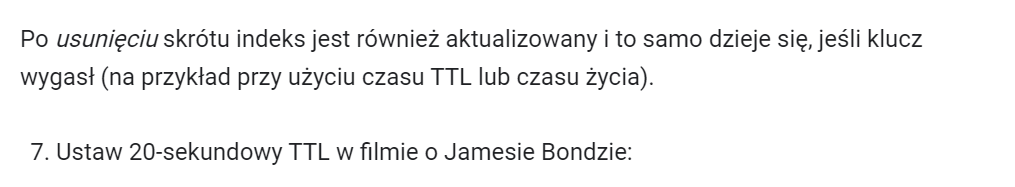

In [ ]:
EXPIRE "movie:11033" 20

In [ ]:
127.0.0.1:6379> EXPIRE "movie:11033" 20
(integer) 1
127.0.0.1:6379>

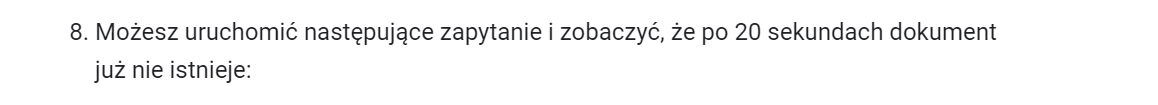

In [ ]:
FT.SEARCH idx:movie "007" RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "007" RETURN 2 title release_year
1) (integer) 0
127.0.0.1:6379>

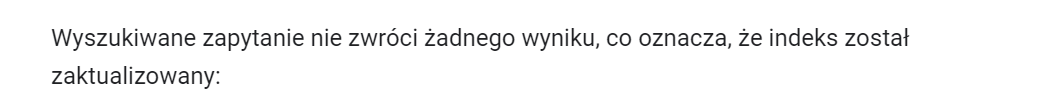

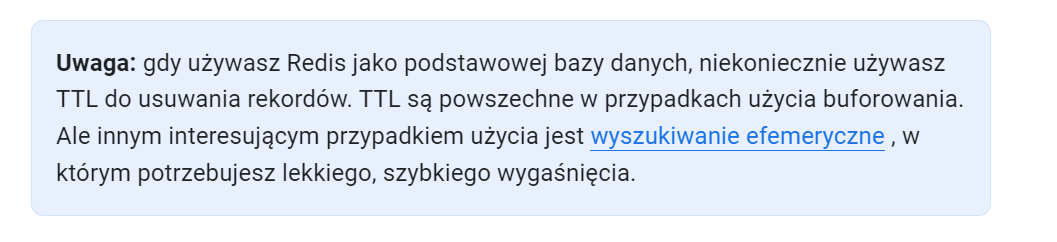

In [ ]:
# https://redis.com/blog/the-case-for-ephemeral-search/

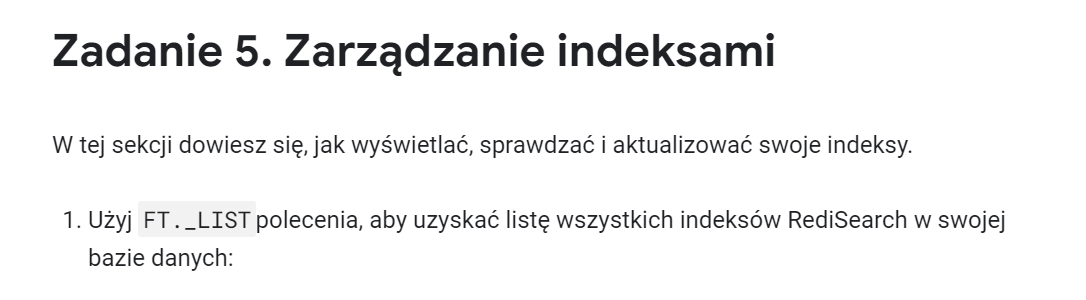

In [ ]:
FT._LIST

In [ ]:
127.0.0.1:6379> FT._LIST
1) "idx:movie"
127.0.0.1:6379>

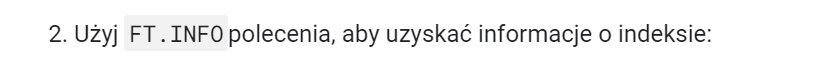

In [ ]:
FT.INFO "idx:movie"

In [ ]:
127.0.0.1:6379> FT.INFO "idx:movie"
 1) index_name
 2) idx:movie
 3) index_options
 4) (empty array)
 5) index_definition
 6)  1) key_type
     2) HASH
     3) prefixes
     4) 1) movie:
     5) language_field
     6) __language
     7) default_score
     8) "1"
     9) score_field
    10) __score
    11) payload_field
    12) __payload
 7) fields

#  itd.

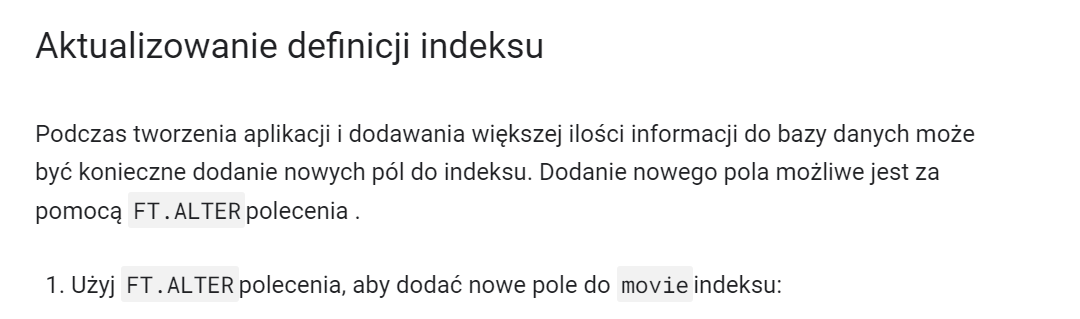

In [ ]:
FT.ALTER idx:movie SCHEMA ADD plot TEXT WEIGHT 0.5

In [ ]:
127.0.0.1:6379> FT.ALTER idx:movie SCHEMA ADD plot TEXT WEIGHT 0.5
OK
127.0.0.1:6379>

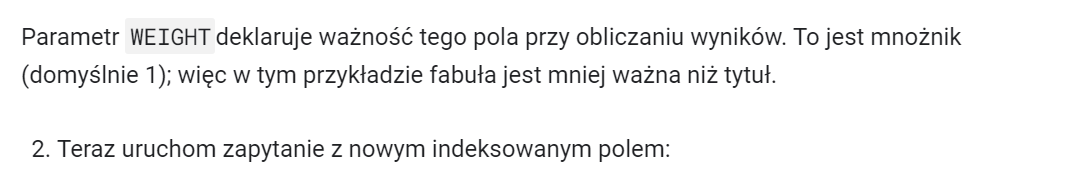

In [ ]:
FT.SEARCH idx:movie "empire @genre:{Action}" RETURN 2 title plot

In [ ]:
127.0.0.1:6379> FT.SEARCH idx:movie "empire @genre:{Action}" RETURN 2 title plot
1) (integer) 2
2) "movie:11002"
3) 1) "title"
   2) "Star Wars: Episode V - The Empire Strikes Back"
   3) "plot"
   4) "After the Rebels are brutally overpowered by the Empire on the ice planet Hoth, Luke Skywalker begins Jedi training with Yoda, while his friends are pursued by Darth Vader and a bounty hunter named Boba Fett all over the galaxy."
4) "movie:11005"
5) 1) "title"
   2) "Star Wars: Episode VI - Return of the Jedi"
   3) "plot"
   4) "The Rebels dispatch to Endor to destroy the second Empire's Death Star."
127.0.0.1:6379>

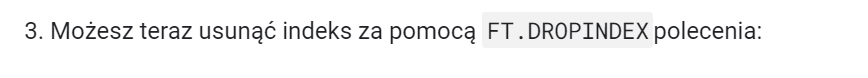

In [ ]:
FT.DROPINDEX idx:movie

In [ ]:
127.0.0.1:6379> FT.DROPINDEX idx:movie
OK
127.0.0.1:6379>

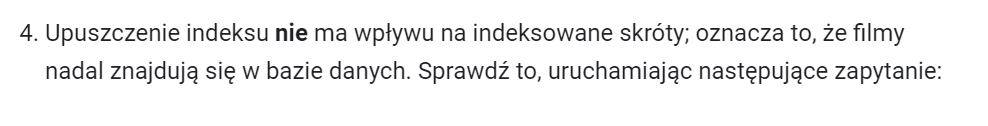

In [ ]:
SCAN 0 MATCH movie:*

In [ ]:
127.0.0.1:6379> SCAN 0 MATCH movie:*
1) "0"
2) 1) "movie:11003"
   2) "movie:11004"
   3) "movie:11005"
   4) "movie:11002"
127.0.0.1:6379>

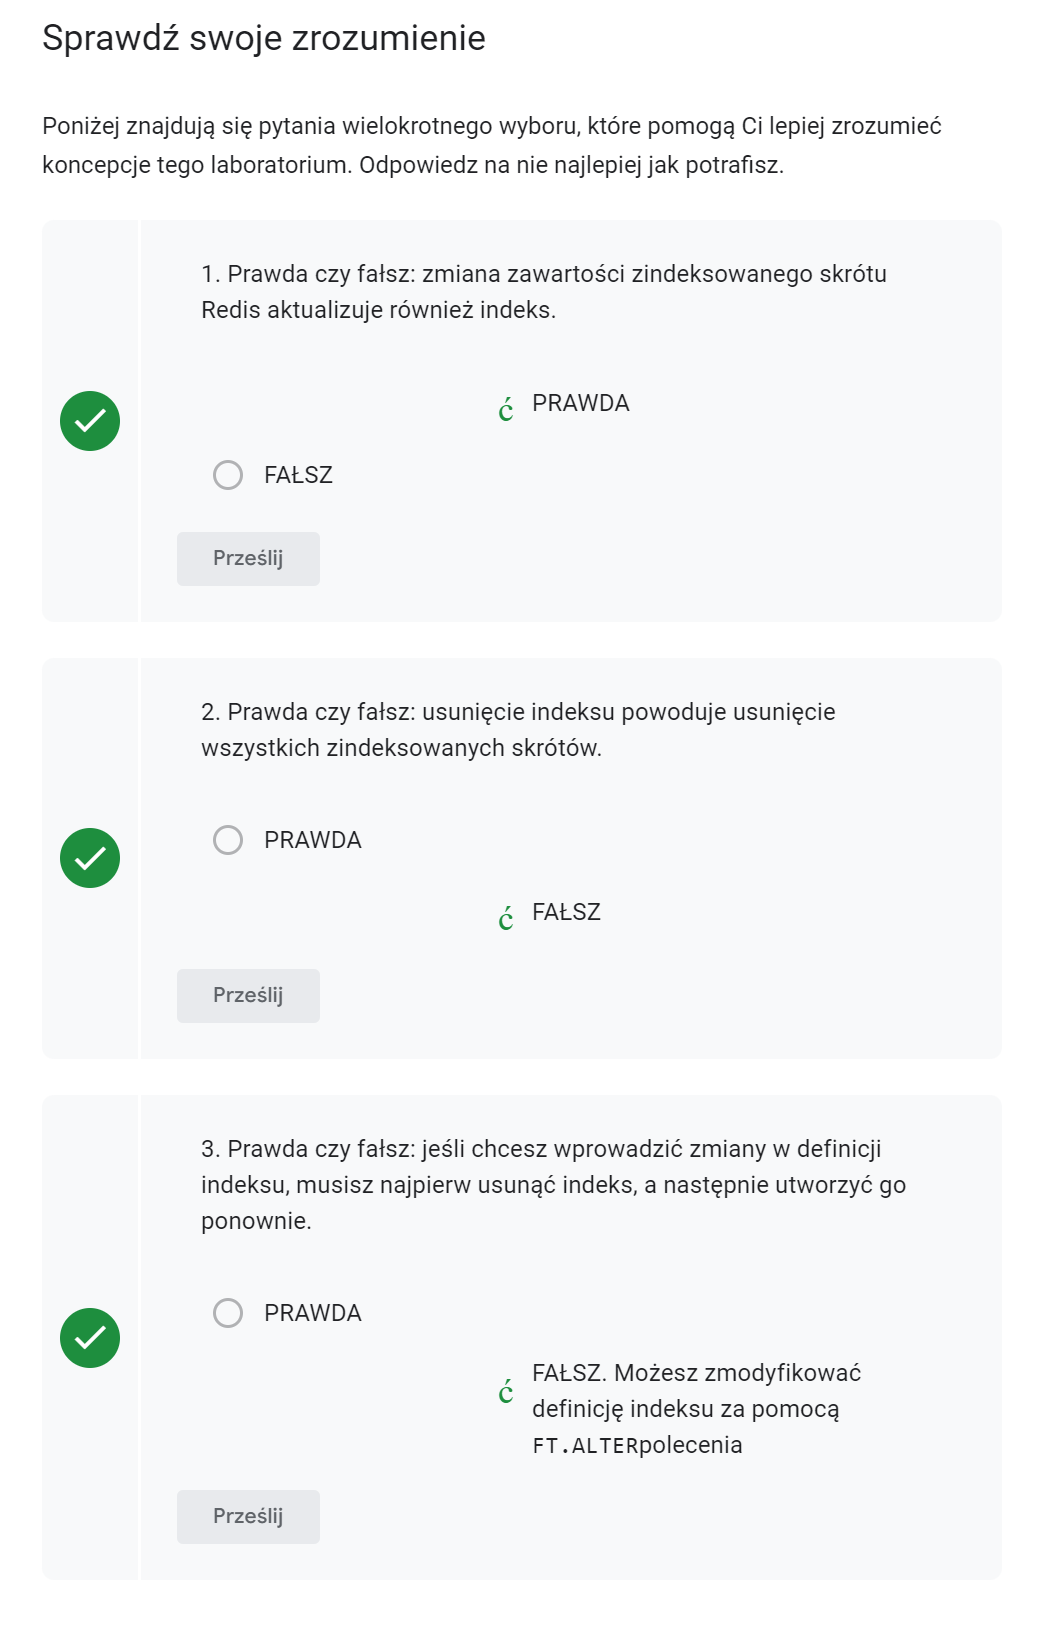

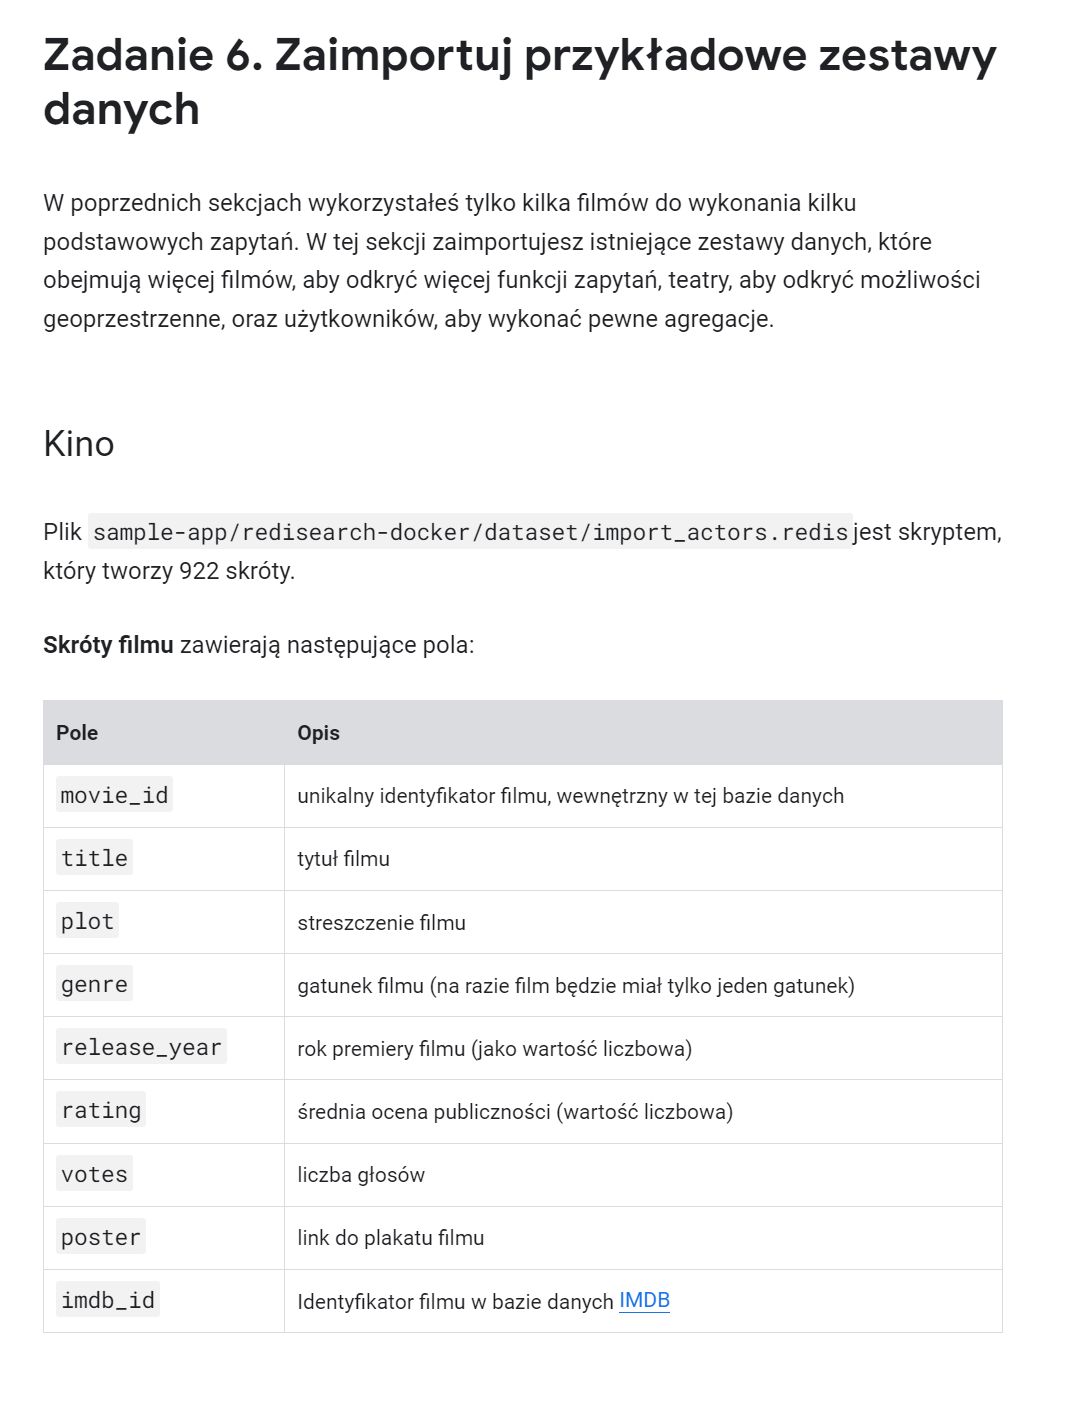

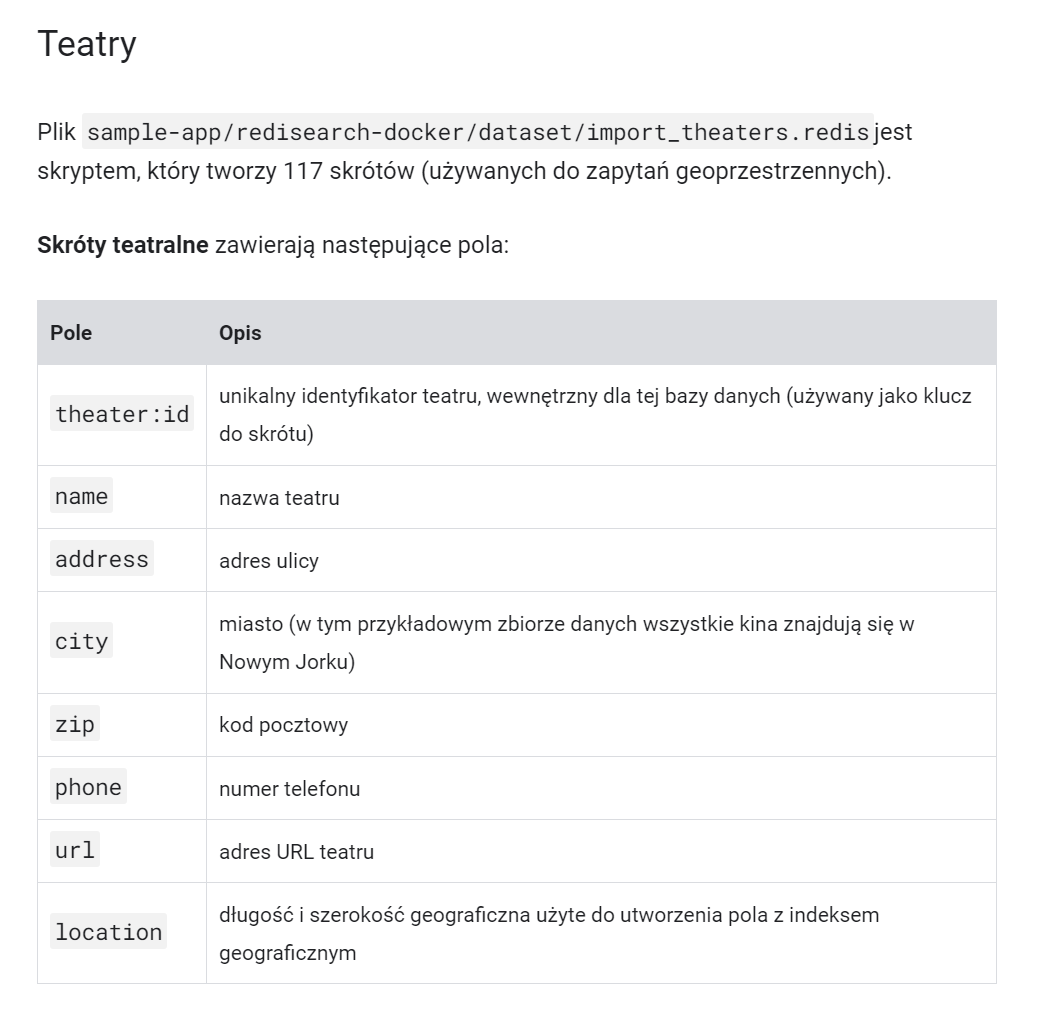

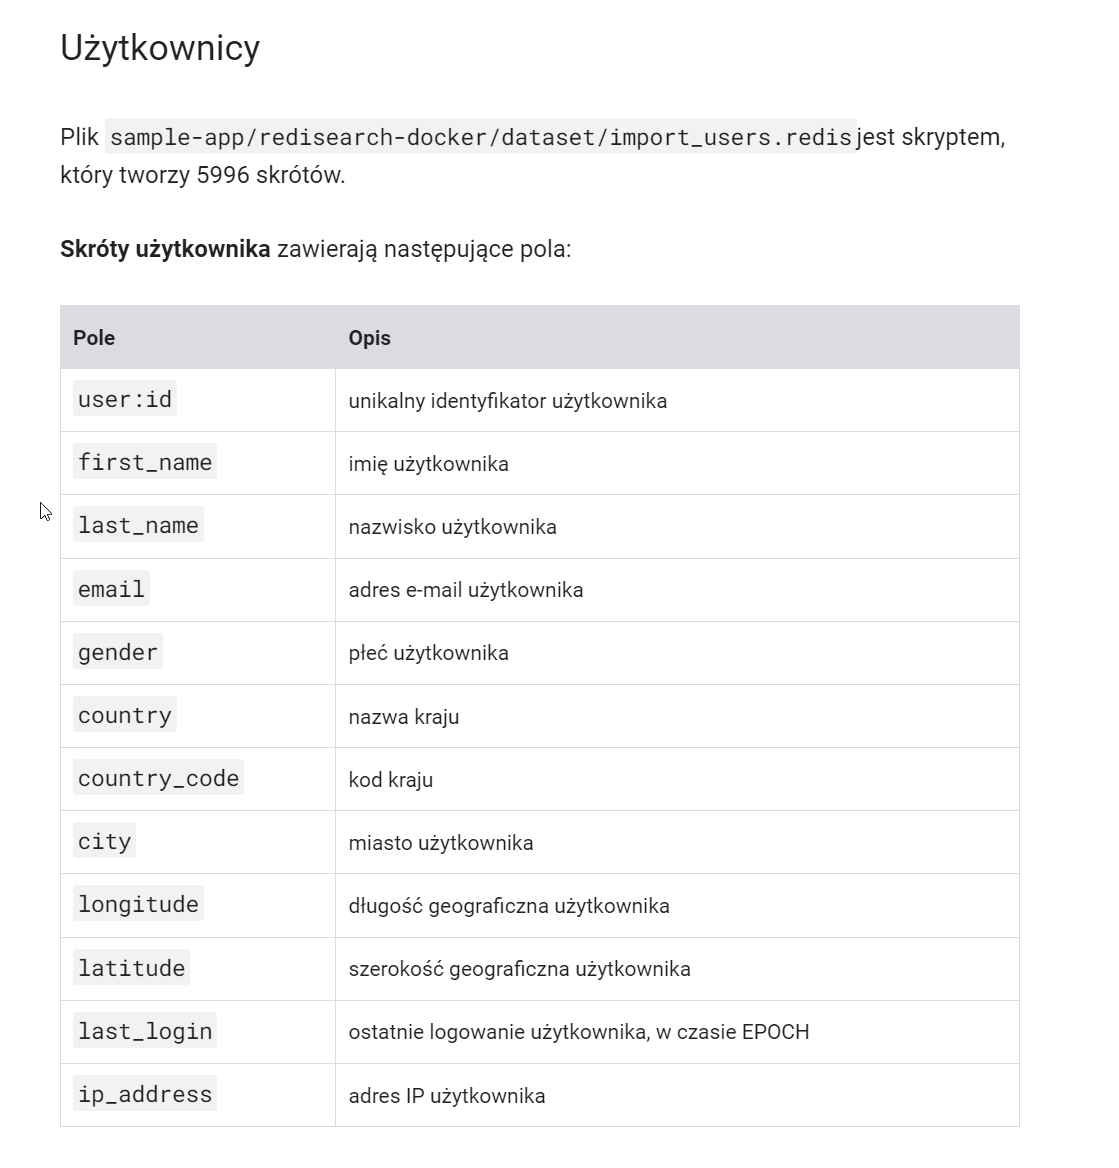

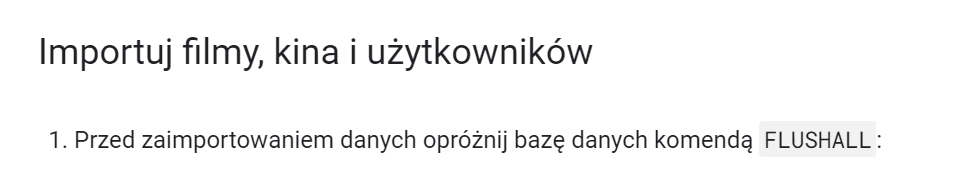

In [ ]:
FLUSHALL

In [ ]:
127.0.0.1:6379> FLUSHALL
OK
127.0.0.1:6379>

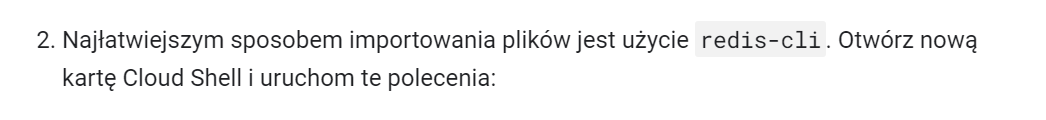

In [ ]:
cd redisearch-getting-started
redis-cli -h localhost -p 6379 < ./sample-app/redisearch-docker/dataset/import_movies.redis
redis-cli -h localhost -p 6379 < ./sample-app/redisearch-docker/dataset/import_theaters.redis
redis-cli -h localhost -p 6379 < ./sample-app/redisearch-docker/dataset/import_users.redis

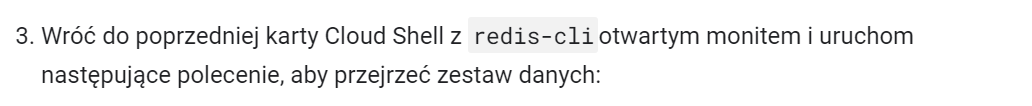

In [ ]:
HMGET "movie:343" title release_year genre

In [ ]:
127.0.0.1:6379> HMGET "movie:343" title release_year genre
1) "Spider-Man"
2) "2002"
3) "Action"
127.0.0.1:6379>

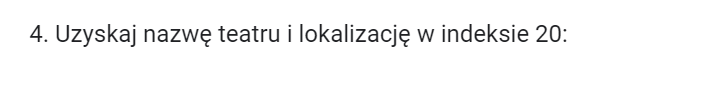

In [ ]:
HMGET "theater:20" name location

In [ ]:
127.0.0.1:6379> HMGET "theater:20" name location
1) "Broadway Theatre"
2) "-73.98335054631019,40.763270202723625"
127.0.0.1:6379>

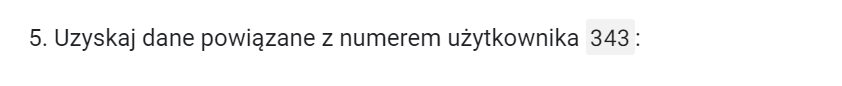

In [ ]:
HMGET "user:343" first_name last_name last_login

In [ ]:
127.0.0.1:6379> HMGET "user:343" first_name last_name last_login
1) "Umeko"
2) "Castagno"
3) "1574769122"
127.0.0.1:6379>

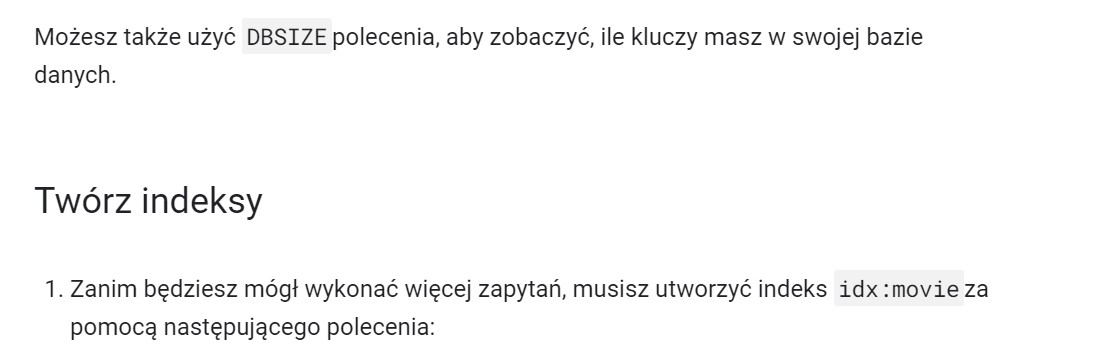

In [ ]:
127.0.0.1:6379> DBSIZE
(integer) 7035
127.0.0.1:6379>

In [ ]:
FT.CREATE idx:movie ON hash PREFIX 1 "movie:" SCHEMA title TEXT SORTABLE plot TEXT WEIGHT 0.5 release_year NUMERIC SORTABLE rating NUMERIC SORTABLE votes NUMERIC SORTABLE genre TAG SORTABLE

In [ ]:
127.0.0.1:6379> FT.CREATE idx:movie ON hash PREFIX 1 "movie:" SCHEMA title TEXT SORTABLE plot TEXT WEIGHT 0.5 release_year NUMERIC SORTABLE rating NUMERIC SORTABLE votes NUMERIC SORTABLE genre TAG SORTABLE
OK
127.0.0.1:6379>

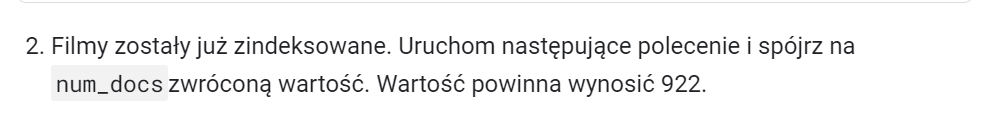

In [ ]:
FT.INFO "idx:movie"

In [ ]:
127.0.0.1:6379> FT.INFO "idx:movie"
 1) index_name
 2) idx:movie
 3) index_options
 4) (empty array)
 5) index_definition
 6)  1) key_type
     2) HASH
     3) prefixes
     4) 1) movie:
     5) language_field
     6) __language
     7) default_score
     8) "1"
     9) score_field
    10) __score
    11) payload_field
    12) __payload
 7) fields
 8) 1) 1) title
       2) type
       3) TEXT
       4) WEIGHT
       5) "1"
       6) SORTABLE
    2) 1) plot
       2) type
       3) TEXT
       4) WEIGHT
       5) "0.5"
    3) 1) release_year
       2) type
       3) NUMERIC
       4) SORTABLE
    4) 1) rating
       2) type
       3) NUMERIC
       4) SORTABLE
    5) 1) votes
       2) type
       3) NUMERIC
       4) SORTABLE
    6) 1) genre
       2) type
       3) TAG
       4) SEPARATOR
       5) ,
       6) SORTABLE
 9) num_docs
10) "922"

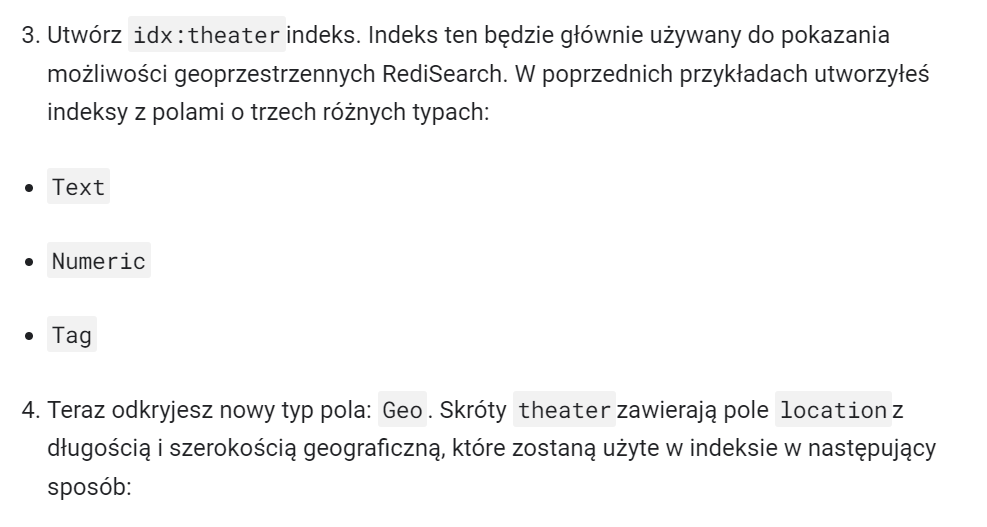

In [ ]:
FT.CREATE idx:theater ON hash PREFIX 1 "theater:" SCHEMA name TEXT SORTABLE location GEO

In [ ]:
127.0.0.1:6379> FT.CREATE idx:theater ON hash PREFIX 1 "theater:" SCHEMA name TEXT SORTABLE location GEO
OK
127.0.0.1:6379>

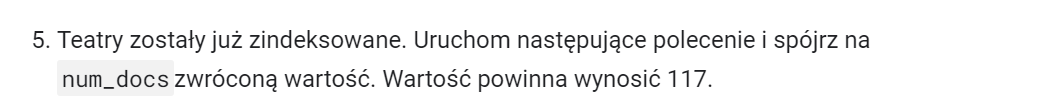

In [ ]:
FT.INFO "idx:theater"

In [ ]:
127.0.0.1:6379> FT.INFO "idx:theater"
 1) index_name
 2) idx:theater
 3) index_options
 4) (empty array)
 5) index_definition
 6)  1) key_type
     2) HASH
     3) prefixes
     4) 1) theater:
     5) language_field
     6) __language
     7) default_score
     8) "1"
     9) score_field
    10) __score
    11) payload_field
    12) __payload
 7) fields
 8) 1) 1) name
       2) type
       3) TEXT
       4) WEIGHT
       5) "1"
       6) SORTABLE
    2) 1) location
       2) type
       3) GEO
 9) num_docs
10) "117"
11) max_doc_id
12) "117"

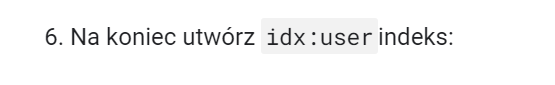

In [ ]:
FT.CREATE idx:user ON hash PREFIX 1 "user:" SCHEMA gender TAG country TAG SORTABLE last_login NUMERIC SORTABLE location GEO

In [ ]:
127.0.0.1:6379> FT.CREATE idx:user ON hash PREFIX 1 "user:" SCHEMA gender TAG country TAG SORTABLE last_login NUMERIC SORTABLE location GEO
OK
127.0.0.1:6379>

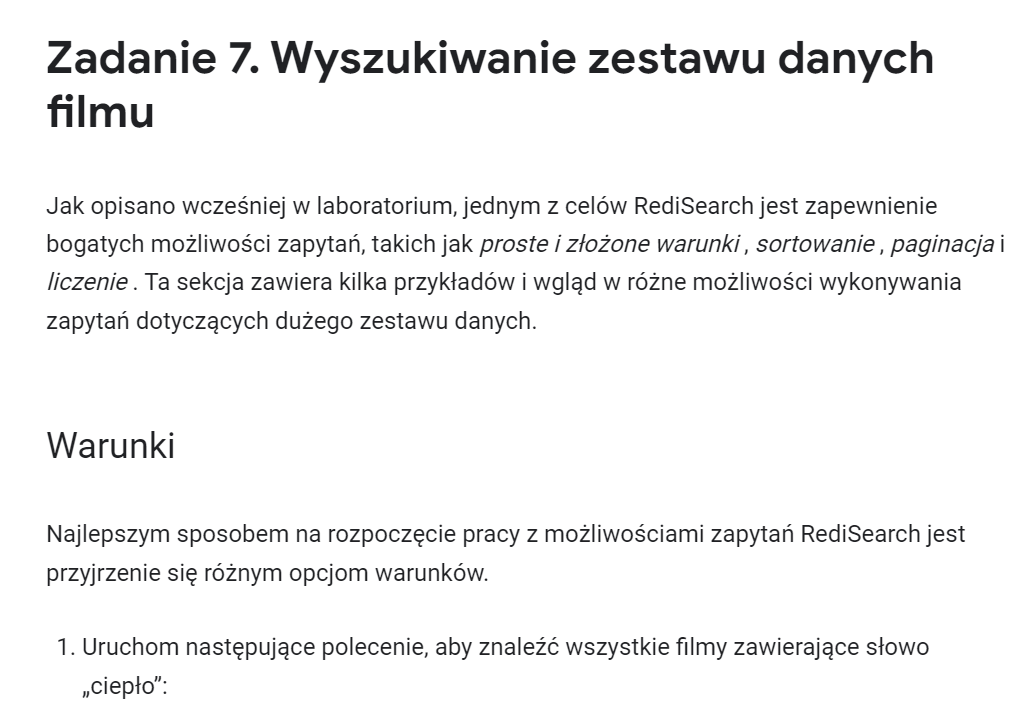

In [ ]:
FT.SEARCH "idx:movie" "heat" RETURN 2 title plot

In [ ]:
127.0.0.1:6379> FT.SEARCH "idx:movie" "heat" RETURN 2 title plot
1) (integer) 4
2) "movie:1141"
3) 1) "title"
   2) "Heat"
   3) "plot"
   4) "A group of professional bank robbers start to feel the heat from police when they unknowingly leave a clue at their latest heist."
4) "movie:818"
5) 1) "title"
   2) "California Heat"
   3) "plot"
   4) "A lifeguard bets he can be true to just one woman."
6) "movie:736"
7) 1) "title"
   2) "Chicago Justice"
   3) "plot"
   4) "The State's Attorney's dedicated team of prosecutors and investigators navigates heated city politics and controversy head-on,while fearlessly pursuing justice."
8) "movie:1109"
9) 1) "title"
   2) "Love & Hip Hop: Miami"
   3) "plot"
   4) "'Love and Hip Hop Miami' turns up the heat and doesn't hold back in making the 305 the place to be. Multi-platinum selling hip-hop legend Trick Daddy is back in the studio collaborating ..."
127.0.0.1:6379>

In [ ]:
# https://redis.io/docs/stack/search/reference/stemming/

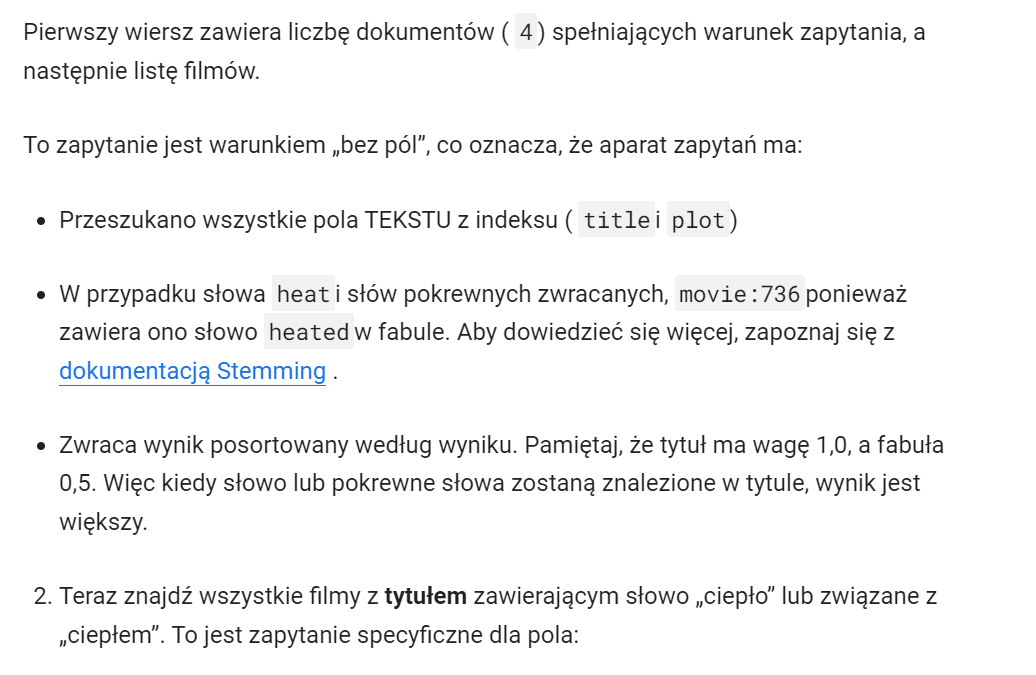

In [ ]:
FT.SEARCH "idx:movie" "@title:heat" RETURN 2 title plot

In [ ]:
127.0.0.1:6379> FT.SEARCH "idx:movie" "@title:heat" RETURN 2 title plot
1) (integer) 2
2) "movie:1141"
3) 1) "title"
   2) "Heat"
   3) "plot"
   4) "A group of professional bank robbers start to feel the heat from police when they unknowingly leave a clue at their latest heist."
4) "movie:818"
5) 1) "title"
   2) "California Heat"
   3) "plot"
   4) "A lifeguard bets he can be true to just one woman."
127.0.0.1:6379>

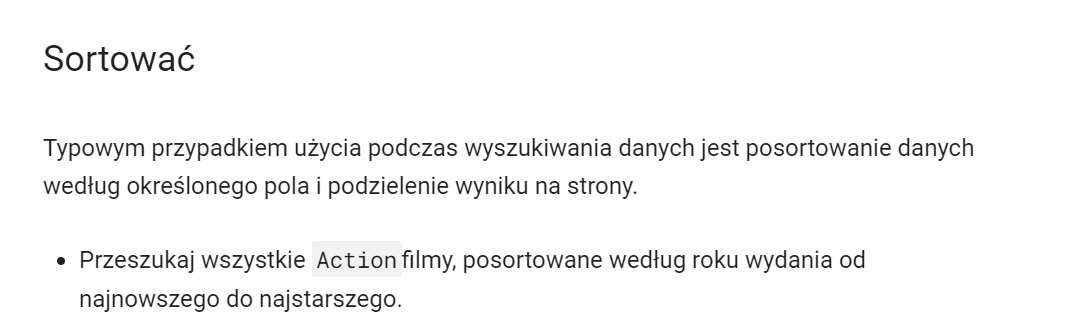

In [ ]:
FT.SEARCH "idx:movie" "@genre:{Action}"  SORTBY release_year DESC RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH "idx:movie" "@genre:{Action}"  SORTBY release_year DESC RETURN 2 title release_year
 1) (integer) 186
 2) "movie:360"
 3) 1) "release_year"
    2) "2019"
    3) "title"
    4) "Spider-Man: Far from Home"
 4) "movie:287"
 5) 1) "release_year"
    2) "2019"
    3) "title"
    4) "Star Wars: Episode IX - The Rise of Skywalker"
 6) "movie:940"
 7) 1) "release_year"
    2) "2018"
    3) "title"
    4) "Texas (2018)"
 8) "movie:737"
 9) 1) "release_year"
    2) "2018"
    3) "title"
    4) "NXT TakeOver: Chicago II"
10) "movie:286"
11) 1) "release_year"
    2) "2017"
    3) "title"
    4) "Battle for the Lost Planet (Galaxy)"
12) "movie:358"
13) 1) "release_year"
    2) "2017"
    3) "title"
    4) "Spider-Man: Homecoming"
14) "movie:289"
15) 1) "release_year"
    2) "2017"
    3) "title"
    4) "Star Wars: Episode VIII - The Last Jedi"
16) "movie:988"
17) 1) "release_year"
    2) "2017"
    3) "title"
    4) "Destruction Los Angeles"
18) "movie:295"
19) 1) "release_year"
    2) "2017"
    3) "title"
    4) "Guardians of the Galaxy Vol. 2"
20) "movie:250"
21) 1) "release_year"
    2) "2016"
    3) "title"
    4) "The Nice Guys"
127.0.0.1:6379>

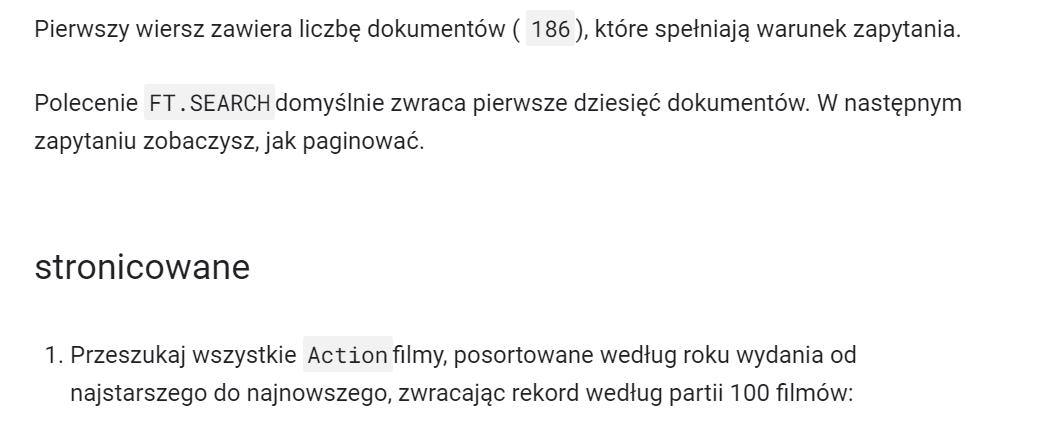

In [ ]:
FT.SEARCH "idx:movie" "@genre:{Action}" LIMIT 0 100  SORTBY release_year ASC RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH "idx:movie" "@genre:{Action}" LIMIT 0 100  SORTBY release_year ASC RETURN 2 title release_year
  1) (integer) 186
  2) "movie:892"
  3) 1) "release_year"
     2) "1966"
     3) "title"
     4) "Texas,Adios"
  4) "movie:361"
  5) 1) "release_year"
     2) "1970"
     3) "title"
     4) "The Train"
  6) "movie:527"
  7) 1) "release_year"
     2) "1970"
     3) "title"
     4) "Beyond Reason"
  8) "movie:473"
  9) 1) "release_year"
     2) "1970"
     3) "title"
     4) "A Bullet for Pretty Boy"
 10) "movie:581"
 11) 1) "release_year"
     2) "1973"
     3) "title"
     4) "Village on Fire"
 12) "movie:797"
 13) 1) "release_year"
     2) "1973"
     3) "title"
     4) "The California Connection"


# itd.

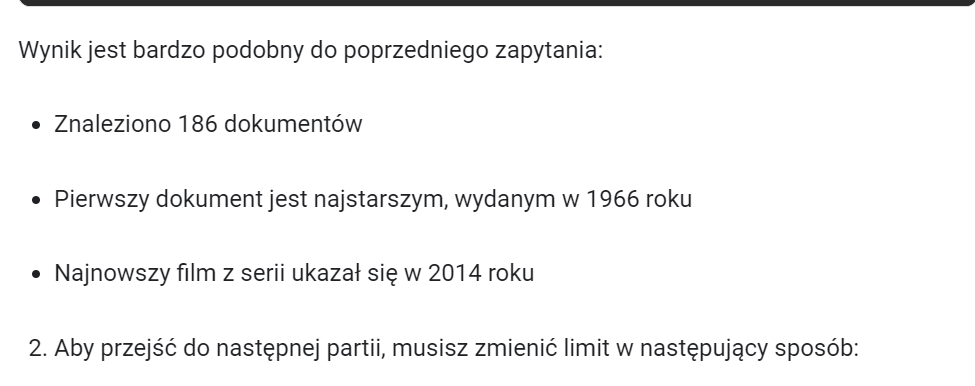

In [ ]:
FT.SEARCH "idx:movie" "@genre:{Action}" LIMIT 100 200  SORTBY release_year ASC RETURN 2 title release_year

In [ ]:
127.0.0.1:6379> FT.SEARCH "idx:movie" "@genre:{Action}" LIMIT 100 200  SORTBY release_year ASC RETURN 2 title release_year
  1) (integer) 186
  2) "movie:733"
  3) 1) "release_year"
     2) "2014"
     3) "title"
     4) "Chicago P.D."
  4) "movie:20"
  5) 1) "release_year"
     2) "2014"
     3) "title"
     4) "Need for Speed"
  6) "movie:36"
  7) 1) "release_year"
     2) "2014"
     3) "title"
     4) "The Maze Runner"
  8) "movie:22"
  9) 1) "release_year"
     2) "2014"
     3) "title"
     4) "Dracula Untold"
 10) "movie:80"
 11) 1) "release_year"
     2) "2014"
     3) "title"
     4) "The Guest"
 12) "movie:15"
 13) 1) "release_year"
     2) "2014"
     3) "title"
     4) "Edge of Tomorrow"

# itd.

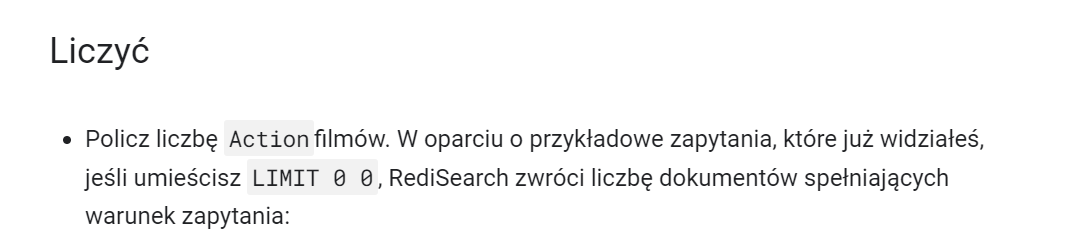

In [ ]:
FT.SEARCH "idx:movie" "@genre:{Action}" LIMIT 0 0

In [ ]:
127.0.0.1:6379> FT.SEARCH "idx:movie" "@genre:{Action}" LIMIT 0 0
1) (integer) 186
127.0.0.1:6379>

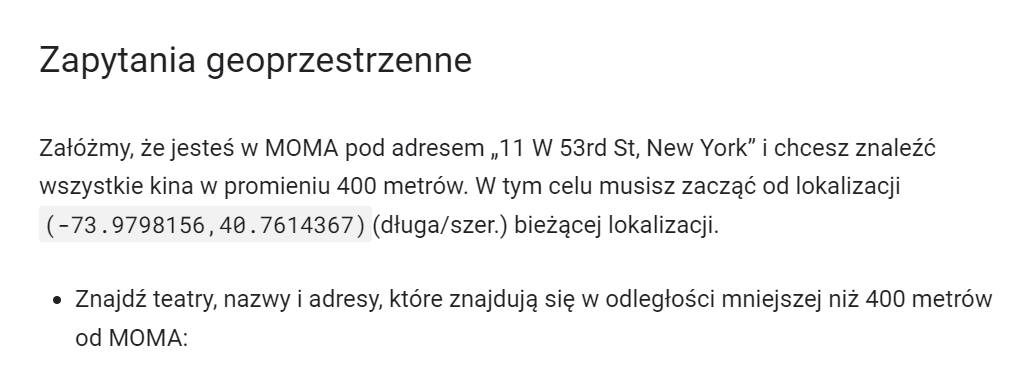

In [ ]:
FT.SEARCH "idx:theater" "@location:[-73.9798156 40.7614367 400 m]" RETURN 2 name address

In [ ]:
1) (integer) 186
127.0.0.1:6379> FT.SEARCH "idx:theater" "@location:[-73.9798156 40.7614367 400 m]" RETURN 2 name address
 1) (integer) 5
 2) "theater:115"
 3) 1) "name"
    2) "Winter Garden Theatre"
    3) "address"
    4) "1634 Broadway"
 4) "theater:27"
 5) 1) "name"
    2) "Cort Theatre"
    3) "address"
    4) "138 W 48th St"
 6) "theater:30"
 7) 1) "name"
    2) "Ed Sullivan Theater"
    3) "address"
    4) "1697 Broadway"
 8) "theater:20"
 9) 1) "name"
    2) "Broadway Theatre"
    3) "address"
    4) "1681 Broadway"
10) "theater:88"
11) 1) "name"
    2) "Snapple Theater Center"
    3) "address"
    4) "1627 Broadway"
127.0.0.1:6379>

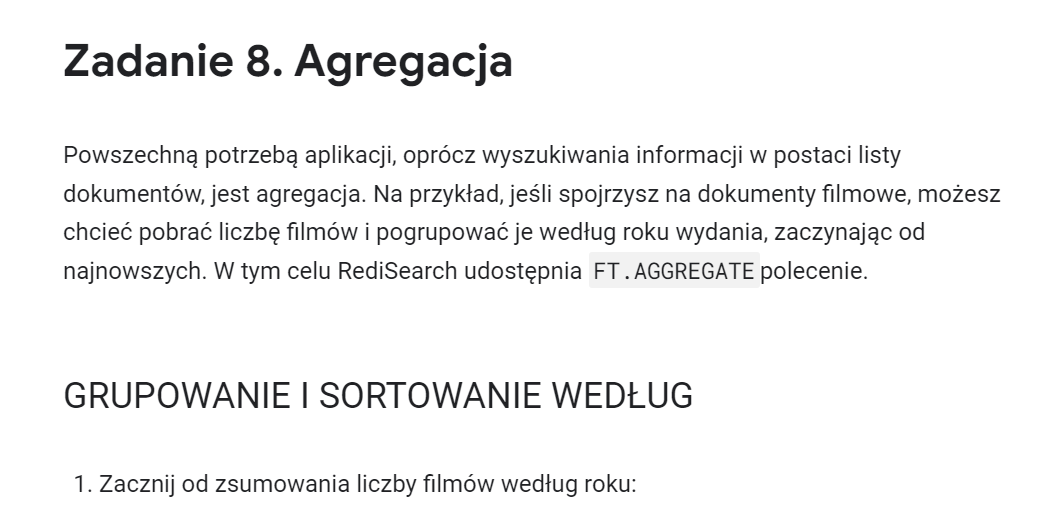

In [ ]:
FT.AGGREGATE "idx:movie" "*" GROUPBY 1 @release_year REDUCE COUNT 0 AS nb_of_movies

In [ ]:
127.0.0.1:6379> FT.AGGREGATE "idx:movie" "*" GROUPBY 1 @release_year REDUCE COUNT 0 AS nb_of_movies
 1) (integer) 60
 2) 1) "release_year"
    2) "1977"
    3) "nb_of_movies"
    4) "11"
 3) 1) "release_year"
    2) "1964"
    3) "nb_of_movies"
    4) "9"
 4) 1) "release_year"
    2) "1991"
    3) "nb_of_movies"
    4) "12"
 5) 1) "release_year"
    2) "2004"
    3) "nb_of_movies"
    4) "12"
 6) 1) "release_year"
    2) "2017"
    3) "nb_of_movies"
    4) "15"
 7) 1) "release_year"
    2) "1971"
    3) "nb_of_movies"
    4) "7"


# itd.

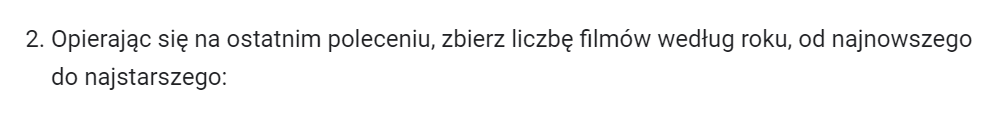

In [ ]:
FT.AGGREGATE "idx:movie" "*" GROUPBY 1 @release_year REDUCE COUNT 0 AS nb_of_movies SORTBY 2 @release_year DESC

In [ ]:
127.0.0.1:6379> FT.AGGREGATE "idx:movie" "*" GROUPBY 1 @release_year REDUCE COUNT 0 AS nb_of_movies SORTBY 2 @release_year DESC
 1) (integer) 60
 2) 1) "release_year"
    2) "2019"
    3) "nb_of_movies"
    4) "14"
 3) 1) "release_year"
    2) "2018"
    3) "nb_of_movies"
    4) "15"
 4) 1) "release_year"
    2) "2017"
    3) "nb_of_movies"
    4) "15"
 5) 1) "release_year"
    2) "2016"
    3) "nb_of_movies"
    4) "100"
 6) 1) "release_year"
    2) "2015"
    3) "nb_of_movies"
    4) "105"
 7) 1) "release_year"
    2) "2014"
    3) "nb_of_movies"
    4) "100"
 8) 1) "release_year"
    2) "2013"
    3) "nb_of_movies"
    4) "12"
 9) 1) "release_year"
    2) "2012"
    3) "nb_of_movies"
    4) "13"
10) 1) "release_year"
    2) "2011"
    3) "nb_of_movies"
    4) "12"
11) 1) "release_year"
    2) "2010"
    3) "nb_of_movies"
    4) "15"
127.0.0.1:6379>

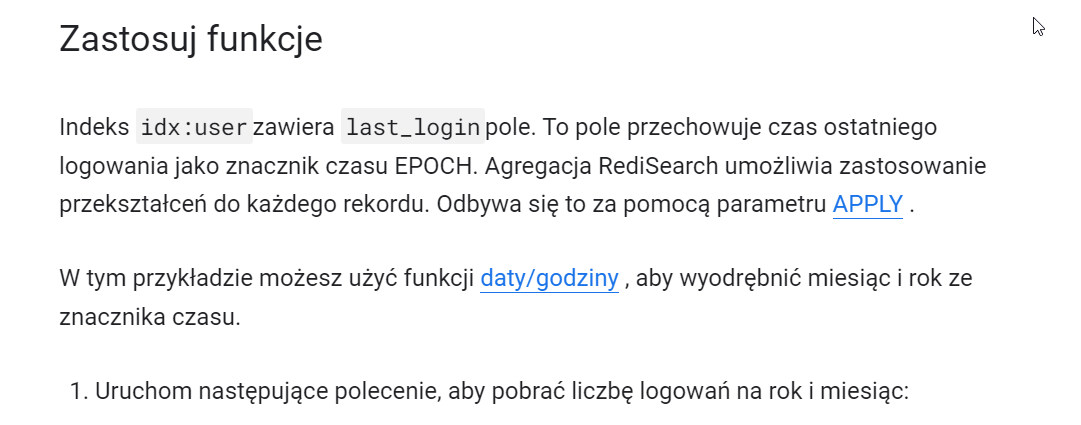

In [ ]:
# https://redis.io/docs/stack/search/reference/aggregations/#apply-expressions

# https://redis.io/docs/stack/search/reference/aggregations/#list-of-datetime-apply-functions

In [ ]:
FT.AGGREGATE idx:user * APPLY year(@last_login) AS year APPLY "monthofyear(@last_login) + 1" AS month GROUPBY 2 @year @month REDUCE count 0 AS num_login SORTBY 4 @year ASC @month ASC

In [ ]:
127.0.0.1:6379> FT.AGGREGATE idx:user * APPLY year(@last_login) AS year APPLY "monthofyear(@last_login) + 1" AS month GROUPBY 2 @year @month REDUCE count 0 AS num_login SORTBY 4 @year ASC @month ASC
 1) (integer) 13
 2) 1) "year"
    2) "2019"
    3) "month"
    4) "9"
    5) "num_login"
    6) "230"
 3) 1) "year"
    2) "2019"
    3) "month"
    4) "10"
    5) "num_login"
    6) "508"
 4) 1) "year"
    2) "2019"
    3) "month"
    4) "11"
    5) "num_login"
    6) "468"
 5) 1) "year"
    2) "2019"
    3) "month"
    4) "12"
    5) "num_login"
    6) "498"
 6) 1) "year"
    2) "2020"
    3) "month"
    4) "1"
    5) "num_login"
    6) "520"
 7) 1) "year"
    2) "2020"
    3) "month"
    4) "2"
    5) "num_login"
    6) "449"
 8) 1) "year"
    2) "2020"
    3) "month"
    4) "3"
    5) "num_login"
    6) "497"
 9) 1) "year"
    2) "2020"
    3) "month"
    4) "4"
    5) "num_login"
    6) "509"
10) 1) "year"
    2) "2020"
    3) "month"
    4) "5"
    5) "num_login"
    6) "529"
11) 1) "year"
    2) "2020"
    3) "month"
    4) "6"
    5) "num_login"
    6) "502"
127.0.0.1:6379>

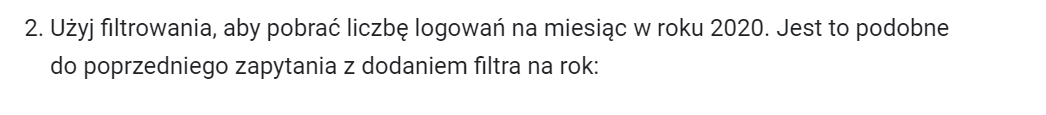

In [ ]:
FT.AGGREGATE idx:user * APPLY year(@last_login) AS year APPLY "monthofyear(@last_login) + 1" AS month GROUPBY 2 @year @month REDUCE count 0 AS num_login  FILTER "@year==2020" SORTBY 2 @month ASC

In [ ]:
127.0.0.1:6379> FT.AGGREGATE idx:user * APPLY year(@last_login) AS year APPLY "monthofyear(@last_login) + 1" AS month GROUPBY 2 @year @month REDUCE count 0 AS num_login  FILTER "@year==2020" SORTBY 2 @month ASC
 1) (integer) 13
 2) 1) "year"
    2) "2020"
    3) "month"
    4) "1"
    5) "num_login"
    6) "520"
 3) 1) "year"
    2) "2020"
    3) "month"
    4) "2"
    5) "num_login"
    6) "449"
 4) 1) "year"
    2) "2020"
    3) "month"
    4) "3"
    5) "num_login"
    6) "497"
 5) 1) "year"
    2) "2020"
    3) "month"
    4) "4"
    5) "num_login"
    6) "509"
 6) 1) "year"
    2) "2020"
    3) "month"
    4) "5"
    5) "num_login"
    6) "529"
 7) 1) "year"
    2) "2020"
    3) "month"
    4) "6"
    5) "num_login"
    6) "502"
 8) 1) "year"
    2) "2020"
    3) "month"
    4) "7"
    5) "num_login"
    6) "488"
 9) 1) "year"
    2) "2020"
    3) "month"
    4) "8"
    5) "num_login"
    6) "527"
10) 1) "year"
    2) "2020"
    3) "month"
    4) "9"
    5) "num_login"
    6) "271"
127.0.0.1:6379>

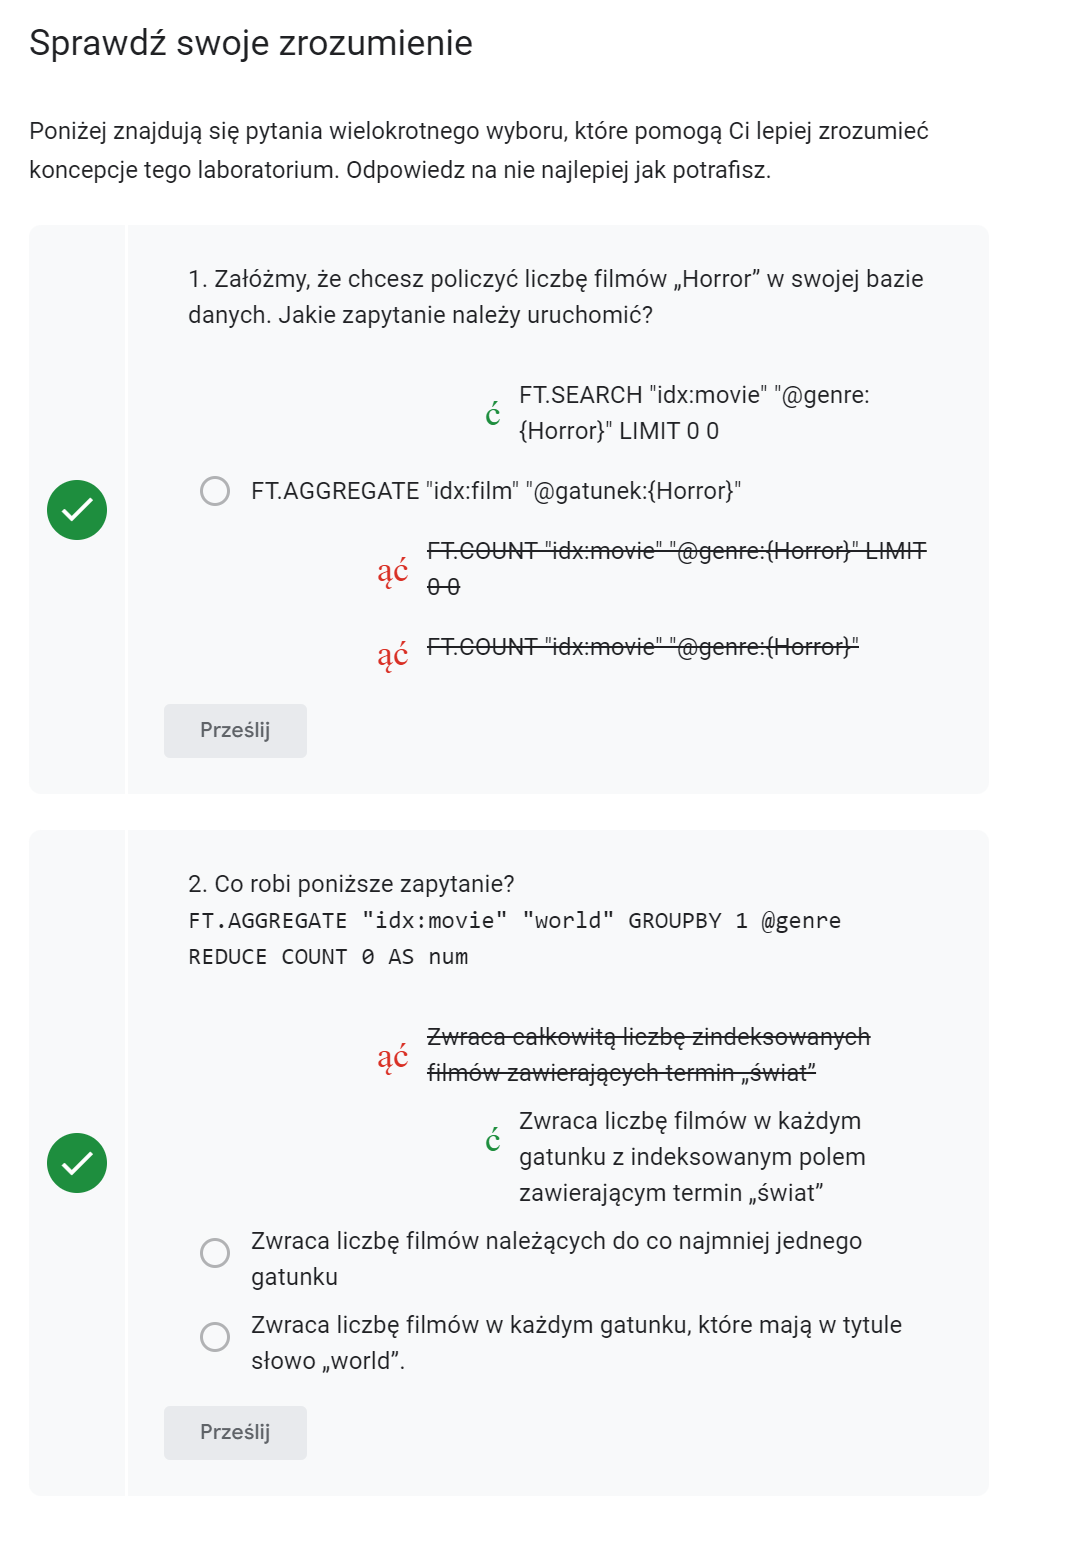

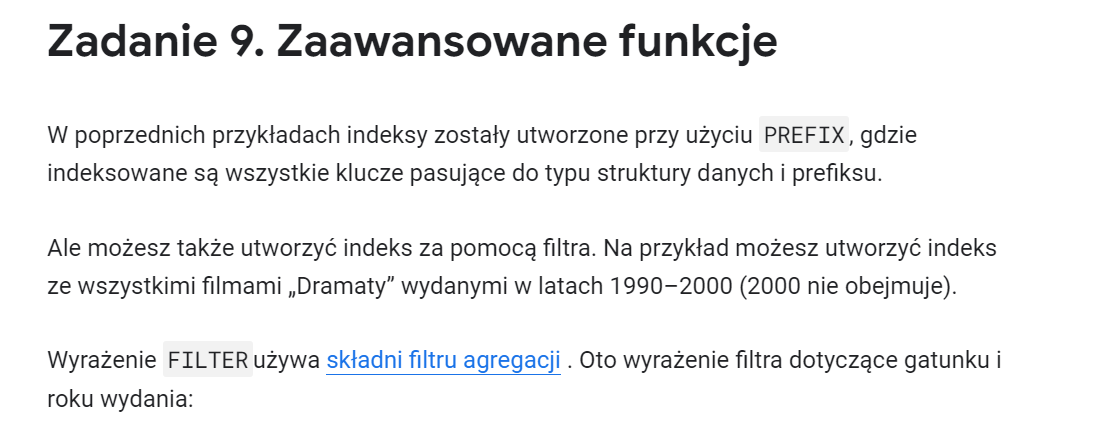

In [ ]:
# https://redis.io/docs/stack/search/reference/aggregations/#filter-expressions

In [ ]:
FILTER "@genre=='Drama' && @release_year>=1990 && @release_year<2000"

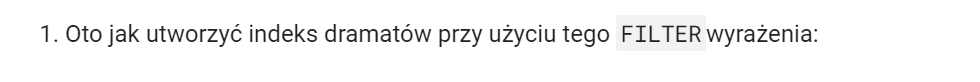

In [ ]:
FT.CREATE idx:drama ON Hash PREFIX 1 "movie:" FILTER "@genre=='Drama' && @release_year>=1990 && @release_year<2000" SCHEMA title TEXT SORTABLE release_year NUMERIC SORTABLE

In [ ]:
127.0.0.1:6379> FT.CREATE idx:drama ON Hash PREFIX 1 "movie:" FILTER "@genre=='Drama' && @release_year>=1990 && @release_year<2000" SCHEMA title TEXT SORTABLE release_year NUMERIC SORTABLE
OK
127.0.0.1:6379>

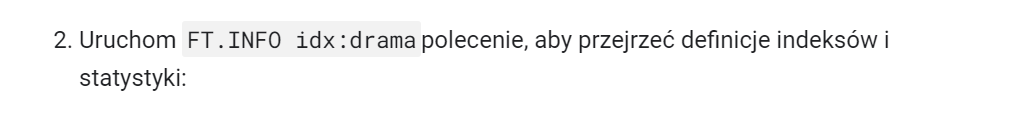

In [ ]:
FT.INFO idx:drama

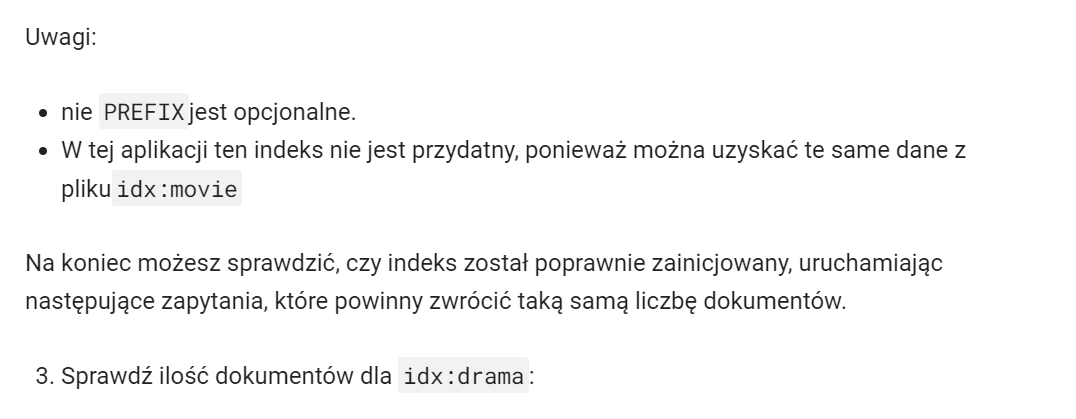

In [ ]:
127.0.0.1:6379> FT.INFO idx:drama
 1) index_name
 2) idx:drama
 3) index_options
 4) (empty array)
 5) index_definition
 6)  1) key_type
     2) HASH
     3) prefixes
     4) 1) movie:
     5) filter
     6) @genre=='Drama' && @release_year>=1990 && @release_year<2000
     7) language_field
     8) __language
     9) default_score
    10) "1"
    11) score_field
    12) __score
    13) payload_field
    14) __payload
 7) fields
 8) 1) 1) title
       2) type
       3) TEXT
       4) WEIGHT
       5) "1"
       6) SORTABLE
    2) 1) release_year
       2) type
       3) NUMERIC
       4) SORTABLE
 9) num_docs
10) "24"
11) max_doc_id
12) "24"
13) num_terms
14) "80"
15) num_records
16) "138"
17) inverted_sz_mb
18) "0.000698089599609375"
19) total_inverted_index_blocks
20) "7863"
21) offset_vectors_sz_mb
22) "8.58306884765625e-05"
23) doc_table_size_mb
24) "0.0020885467529296875"
25) sortable_values_size_mb
26) "0.0015535354614257812"
27) key_table_size_mb
28) "0.000904083251953125"
29) records_per_doc_avg
30) "5.75"
31) bytes_per_record_avg
32) "5.3043479919433594"
33) offsets_per_term_avg
34) "0.65217393636703491"
35) offset_bits_per_record_avg
36) "8"
37) hash_indexing_failures
38) "0"
39) indexing
40) "0"
41) percent_indexed
42) "1"
43) gc_stats
44)  1) bytes_collected
     2) "0"
     3) total_ms_run
     4) "0"
     5) total_cycles
     6) "0"
     7) avarage_cycle_time_ms
     8) "-nan"
     9) last_run_time_ms
    10) "0"
    11) gc_numeric_trees_missed
    12) "0"
    13) gc_blocks_denied
    14) "0"
45) cursor_stats
46) 1) global_idle
    2) (integer) 0
    3) global_total
    4) (integer) 0
    5) index_capacity
    6) (integer) 128
    7) index_total
    8) (integer) 0
127.0.0.1:6379> FT.INFO idx:drama
 1) index_name
 2) idx:drama
 3) index_options
 4) (empty array)
 5) index_definition
 6)  1) key_type
     2) HASH
     3) prefixes
     4) 1) movie:
     5) filter
     6) @genre=='Drama' && @release_year>=1990 && @release_year<2000
     7) language_field
     8) __language
     9) default_score
    10) "1"
    11) score_field
    12) __score
    13) payload_field
    14) __payload
 7) fields
 8) 1) 1) title
       2) type
       3) TEXT
       4) WEIGHT
       5) "1"
       6) SORTABLE
    2) 1) release_year
       2) type
       3) NUMERIC
       4) SORTABLE
 9) num_docs
10) "24"
11) max_doc_id
12) "24"
13) num_terms
14) "80"
15) num_records
16) "138"
17) inverted_sz_mb
18) "0.000698089599609375"
19) total_inverted_index_blocks
20) "7863"
21) offset_vectors_sz_mb
22) "8.58306884765625e-05"
23) doc_table_size_mb
24) "0.0020885467529296875"
25) sortable_values_size_mb
26) "0.0015535354614257812"
27) key_table_size_mb
28) "0.000904083251953125"
29) records_per_doc_avg
30) "5.75"
31) bytes_per_record_avg
32) "5.3043479919433594"
33) offsets_per_term_avg
34) "0.65217393636703491"
35) offset_bits_per_record_avg
36) "8"
37) hash_indexing_failures
38) "0"
39) indexing
40) "0"
41) percent_indexed
42) "1"
43) gc_stats
44)  1) bytes_collected
     2) "0"
     3) total_ms_run
     4) "0"
     5) total_cycles
     6) "0"
     7) avarage_cycle_time_ms
     8) "-nan"
     9) last_run_time_ms
    10) "0"
    11) gc_numeric_trees_missed
    12) "0"
    13) gc_blocks_denied
    14) "0"
45) cursor_stats
46) 1) global_idle
    2) (integer) 0
    3) global_total
    4) (integer) 0
    5) index_capacity
    6) (integer) 128
    7) index_total
    8) (integer) 0
127.0.0.1:6379>

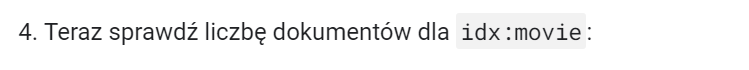

In [ ]:
FT.SEARCH idx:movie "@genre:{Drama}  @release_year:[1990 (2000]" LIMIT 0 0

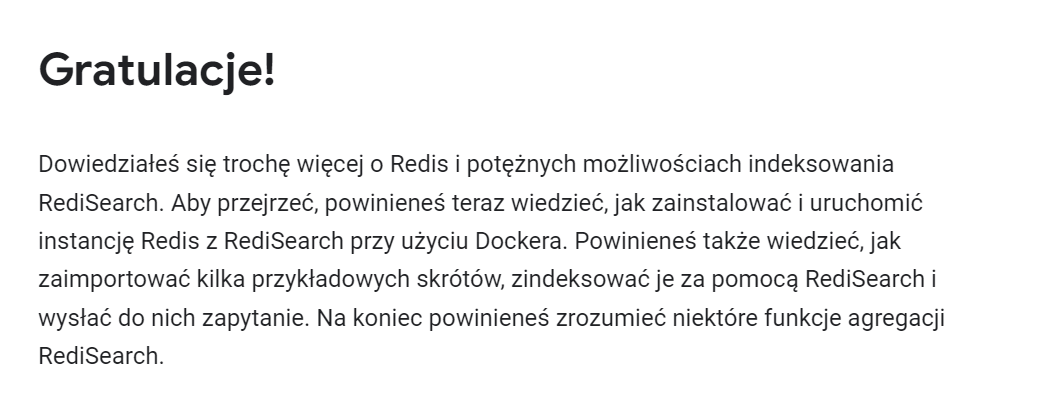